In [1]:
import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

In [2]:
from pathlib import Path

IMAGES_PATH = Path() / "images" / "training_linear_models"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Linear Regression

**Summary**

* Introduces linear regression and two fundamentally different methods for training the model.

**Key Points**

* Linear regression is one of the simplest machine learning models.
* A **closed-form equation** can be used to directly compute optimal model parameters.
* The closed-form solution minimizes the **cost function** over the training dataset.
* **Gradient Descent (GD)** is an iterative optimization approach for training the model.
* GD updates parameters gradually to reduce the cost function.
* Gradient descent converges to the same parameters as the closed-form solution.
* Common GD variants include:

  * **Batch Gradient Descent**
  * **Mini-batch Gradient Descent**
  * **Stochastic Gradient Descent**
* These gradient descent variants are essential for understanding neural networks later.


---

**Summary**

* Explains how linear regression works, starting from a simple single-feature model and extending it to a general multi-feature and vectorized form.

**Key Points**

* A basic linear regression model predicts life satisfaction using GDP per capita as a single input feature.
* The model parameters **θ₀** (bias) and **θ₁** (weight) define the linear relationship.
* In general, linear regression computes predictions as a **weighted sum of input features plus a bias term**.
* The bias term is also called the **intercept**.
* The general linear regression prediction is:

  * ŷ = θ₀ + θ₁x₁ + θ₂x₂ + … + θₙxₙ
* **ŷ** represents the predicted value.
* **n** is the number of input features.
* **xᵢ** denotes the *i*ᵗʰ feature value.
* **θⱼ** represents the *j*ᵗʰ model parameter, including the bias and feature weights.
* The model can be written in **vectorized form** for simplicity and efficiency.
* In vectorized notation:

  * ŷ = hθ(x) = θ · x
* **θ** is the parameter vector (bias + feature weights).
* **x** is the feature vector, with **x₀ = 1** to account for the bias.
* **θ · x** is the dot product, equivalent to the full weighted sum expression.

---


**Summary**

* Training loss functions and evaluation metrics are often different because they serve different purposes in model development.

**Key Points**

* Learning algorithms may optimize a **training loss function** that is different from the **final performance metric**.
* Training loss functions are chosen because they are **easier to optimize**.
* Some loss functions include **extra terms used only during training**, such as regularization.
* A good **performance metric** should closely reflect the **final business objective**.
* A good **training loss** should be:

  * Easy to optimize
  * Strongly correlated with the evaluation metric
* In classification tasks:

  * Models are often trained using **log loss**.
  * Final evaluation is commonly done using **precision and recall**.
* Minimizing log loss typically leads to improved precision and recall.
---

**Summary**

* Training a linear regression model involves choosing parameters that minimize prediction error, typically using Mean Squared Error as the cost function.

**Key Points**

* Training means adjusting model parameters so the model best fits the training data.
* A measure is needed to quantify how well the model fits the data.
* The most common performance measure for regression is **Root Mean Squared Error (RMSE)**.
* Instead of minimizing RMSE directly, models usually minimize **Mean Squared Error (MSE)**.
* Minimizing MSE yields the same solution as minimizing RMSE because both reach their minimum at the same parameter values.
* The MSE cost function measures the average squared difference between predicted and actual values.
* For linear regression, MSE is computed over all training instances.
* The hypothesis is written as **hθ** to emphasize dependence on parameter vector **θ**.
* For simplicity, the cost function is often denoted as **MSE(θ)** instead of explicitly writing the dataset and hypothesis.


$\text{MSE}(\theta) = \frac{1}{m} \sum_{i=1}^{m} (\theta^{T} x^{(i)} - y^{(i)})^2$

---

## The Normal Equation


**Summary**

* The optimal parameters for linear regression can be obtained directly using a closed-form mathematical solution known as the Normal Equation.

**Key Points**

* The goal is to find the value of **θ** that minimizes the Mean Squared Error (MSE).
* A **closed-form solution** computes the optimal parameters directly without iteration.
* This solution is called the **Normal Equation**.
* The Normal Equation is given by:

  * θ̂ = (XᵀX)⁻¹ Xᵀ y
* **θ̂** represents the parameter values that minimize the cost function.
* **X** is the design matrix containing the input features.
* **y** is the target vector containing the output values.
* This approach avoids iterative optimization methods like gradient descent.
---

In [3]:
import numpy as np

np.random.seed(42)  # to make this code example reproducible
m = 100  # number of instances
X = 2 * np.random.rand(m, 1)  # column vector
y = 4 + 3 * X + np.random.randn(m, 1)  # column vector

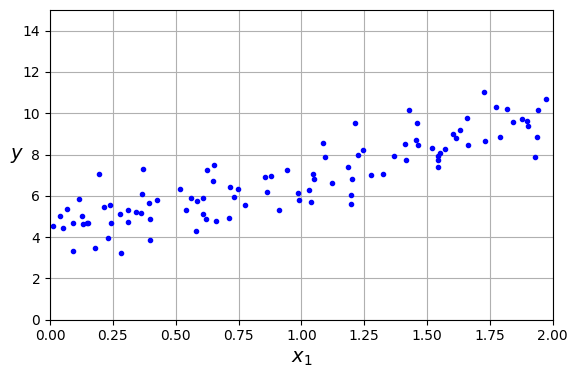

In [4]:
# extra code – generates and saves Figure 4–1

import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
plt.plot(X, y, "b.")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.axis([0, 2, 0, 15])
plt.grid()
save_fig("generated_data_plot")
plt.show()

- Now lets compute theta for inverse we will use ``inv()`` and ``dot()``

In [5]:
from sklearn.preprocessing import add_dummy_feature

In [6]:
X_b = add_dummy_feature(X)

In [7]:
theta_best = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y

> The @ operator performs matrix multiplication. If A and B are NumPy arrays, then A @ B
is equivalent to np.matmul(A, B). Many other libraries, like TensorFlow, PyTorch, and
JAX, support the @ operator as well. However, you cannot use @ on pure Python arrays
(i.e., lists of lists)

In [8]:
# The function that we used to generate the data is y = 4 + 3x + Gaussian noise. 
theta_best

array([[4.21509616],
       [2.77011339]])

We would have hoped for θ = 4 and θ = 3 instead of θ = 4.215 and θ =
2.770. Close enough, but the noise made it impossible to recover the exact
parameters of the original function. The smaller and noisier the dataset, the
harder it gets.

In [9]:
X_new = np.array([[0],[2]])
X_new_b = add_dummy_feature(X_new) # add x0 = 1 to each instance

In [10]:
y_predict = X_new_b @ theta_best

In [11]:
y_predict

array([[4.21509616],
       [9.75532293]])

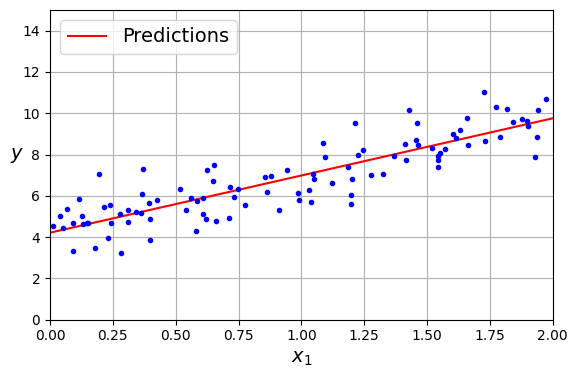

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))  # extra code – not needed, just formatting
plt.plot(X_new, y_predict, "r-", label="Predictions")
plt.plot(X, y, "b.")

# extra code – beautifies and saves Figure 4–2
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.axis([0, 2, 0, 15])
plt.grid()
plt.legend(loc="upper left")
save_fig("linear_model_predictions_plot")

plt.show()

In [13]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X,y)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [14]:
lin_reg.intercept_

array([4.21509616])

In [15]:
lin_reg.coef_

array([[2.77011339]])

In [16]:
lin_reg.predict(X_new)

array([[4.21509616],
       [9.75532293]])

Notice that Scikit-Learn separates the bias term (intercept_) from the feature
weights (coef_). The LinearRegression class is based on the
scipy.linalg.lstsq() function (the name stands for “least squares”), which you
could call directly:

In [17]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[4.21509616],
       [2.77011339]])

In [18]:
np.linalg.pinv(X_b) @ y

array([[4.21509616],
       [2.77011339]])

**Summary**

* Linear regression parameters can be computed using the pseudoinverse of the design matrix, which is more robust and efficient than the Normal Equation.

**Key Points**

* The model parameters are computed as **θ̂ = X⁺ y**, where **X⁺** is the pseudoinverse of **X**.
* In NumPy, the pseudoinverse can be computed directly using `np.linalg.pinv()`.
* NumPy internally uses **Singular Value Decomposition (SVD)** to compute the pseudoinverse.
* SVD decomposes the matrix **X** into three matrices: **U Σ Vᵀ**.
* The pseudoinverse is computed as **X⁺ = V Σ⁺ Uᵀ**.
* To compute **Σ⁺**:

  * Very small singular values are set to zero.
  * Nonzero values are replaced by their inverse.
  * The resulting matrix is transposed.
* This method is more efficient than directly computing the Normal Equation.
* The Normal Equation can fail if **XᵀX** is not invertible (singular).
* Non-invertibility can occur when:

  * The number of training instances **m < n** (features)
  * Some features are redundant or highly correlated
* The pseudoinverse is **always defined**, making it safer for real-world data.


---

## Computational Complexity

**Summary**

* The Normal Equation and SVD-based methods have different computational complexities, and both become slow with a very large number of features, motivating alternative training approaches.

**Key Points**

* The Normal Equation requires inverting **XᵀX**, an ((n+1) \times (n+1)) matrix, where **n** is the number of features.
* Matrix inversion has a computational complexity between **O(n²·⁴)** and **O(n³)**, depending on the implementation.
* Doubling the number of features increases computation time by roughly **5.3 to 8 times** for the Normal Equation.
* The **SVD-based approach** used in Scikit-Learn’s `LinearRegression` has a complexity of about **O(n²)**.
* With SVD, doubling the number of features increases computation time by roughly **4 times**.
* Both Normal Equation and SVD become **very slow for extremely high-dimensional data** (e.g., 100,000 features).
* Both methods scale **linearly with the number of training instances** (**O(m)**), assuming the data fits in memory.
* After training, **predictions are very fast**, with linear complexity in both:

  * Number of instances to predict
  * Number of features
* Doubling instances or features during prediction roughly doubles the prediction time.
* These limitations motivate the use of **alternative training methods** better suited for large datasets or memory constraints.
---

## Gradient Descent

**Summary**

* Gradient descent is an iterative optimization method that minimizes a cost function by moving parameters in the direction of the steepest decrease.

**Key Points**

* Gradient descent is a **general-purpose optimization algorithm**.
* It is used to find optimal solutions for many types of problems.
* The algorithm works by **iteratively adjusting parameters**.
* Adjustments are made to **minimize a cost (error) function**.
* Gradient descent computes the **local gradient** of the cost function with respect to the parameter vector **θ**.
* Parameters are updated in the direction of the **negative (descending) gradient**.
* The process continues until the **gradient becomes zero**.
* A zero gradient indicates that a **minimum has been reached**.
* The mountain and fog analogy illustrates how following the steepest downward slope leads to the lowest point.
---

**Summary**

* Gradient descent starts with random parameters and iteratively updates them, with the learning rate playing a crucial role in convergence and stability.

**Key Points**

* Gradient descent begins with **random initialization** of parameters **θ**.
* Parameters are updated gradually to reduce the cost function (e.g., MSE).
* The process continues until the algorithm **converges** to a minimum.
* The **learning rate** controls the size of each update step.
* If the learning rate is **too small**:

  * Convergence is very slow.
  * Many iterations are required.
* If the learning rate is **too large**:

  * The algorithm may overshoot the minimum.
  * It can **diverge**, producing increasingly worse parameter values.
* Real-world cost functions may be **irregular**, not smooth bowl-shaped curves.
* Such functions can contain:

  * Local minima
  * Plateaus
  * Ridges or flat regions
* Gradient descent may:

  * Get stuck in a **local minimum**
  * Take a long time to cross flat plateaus
* Stopping the algorithm too early can prevent reaching the **global minimum**.
---

**Summary**

* For linear regression, the MSE cost function is convex and smooth, ensuring gradient descent converges to a single global minimum, but feature scaling strongly affects the speed of convergence.

**Key Points**

* The MSE cost function in linear regression is **convex**.
* Convexity means there are **no local minima**, only one **global minimum**.
* The cost function is **continuous and smooth**, with no abrupt slope changes.
* Because of these properties, gradient descent is **guaranteed to approach the global minimum** if:

  * The learning rate is not too high
  * The algorithm is allowed to run long enough
* Although bowl-shaped, the cost function can be **elongated** when features have very different scales.
* When features are on a **similar scale**, gradient descent:

  * Moves directly toward the minimum
  * Converges quickly
* When features have **different scales**, gradient descent:

  * Follows a zig-zag path
  * Takes much longer to converge
* **Feature scaling** (e.g., using `StandardScaler`) is important for efficient convergence.
* Training a model is equivalent to **searching in parameter space** for values that minimize the cost function.
* As the number of parameters increases, the **search space dimensionality grows**, making optimization harder.
* In linear regression, convexity ensures the solution lies at the **bottom of the bowl**, simplifying the search.
---

### Batch Gradient Descen

**Summary**

* Gradient descent trains a linear regression model by computing gradients of the MSE cost function and iteratively updating parameters in the opposite direction of the gradient.

**Key Points**

* To apply gradient descent, we compute how the cost function changes with respect to each parameter **θⱼ**.
* This change is measured using **partial derivatives**.
* Each partial derivative represents the slope of the cost function along one parameter dimension.
* Computing all partial derivatives together forms the **gradient vector**.
* In **batch gradient descent**, the gradient is computed using the **entire training set** at every step.
* Batch gradient descent is slow for very large datasets but:

  * Scales well with a large number of features
  * Is faster than the Normal Equation or SVD in high-dimensional spaces
* The gradient vector points **uphill**, so parameters are updated in the opposite direction.
* The **learning rate (η)** controls the size of each update step.
* Gradient descent updates parameters iteratively until convergence.


---

$$
\frac{\partial}{\partial \theta_j},\text{MSE}(\theta)
= \frac{2}{m}\sum_{i=1}^{m}\left(\theta^{T}x^{(i)} - y^{(i)}\right)x^{(i)}_{j}
$$

---

$$
\nabla_{\theta},\text{MSE}(\theta)
= \frac{2}{m},X^{T}(X\theta - y)
$$

---

$$
\theta_{\text{next}} = \theta - \eta,\nabla_{\theta},\text{MSE}(\theta)
$$

---

In [19]:
eta = 0.1  # learning rate
n_epochs = 1000
m = len(X_b)  # number of instances

np.random.seed(42)
theta = np.random.randn(2, 1)  # randomly initialized model parameters

for epoch in range(n_epochs):
    gradients = 2 / m * X_b.T @ (X_b @ theta - y)
    theta = theta - eta * gradients

In [20]:
theta

array([[4.21509616],
       [2.77011339]])

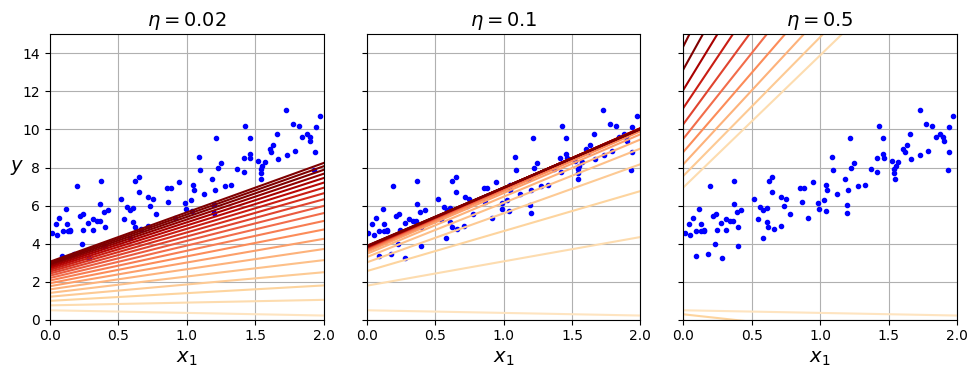

In [21]:
# extra code – generates and saves Figure 4–8

import matplotlib as mpl

def plot_gradient_descent(theta, eta):
    m = len(X_b)
    plt.plot(X, y, "b.")
    n_epochs = 1000
    n_shown = 20
    theta_path = []
    for epoch in range(n_epochs):
        if epoch < n_shown:
            y_predict = X_new_b @ theta
            color = mpl.colors.rgb2hex(plt.cm.OrRd(epoch / n_shown + 0.15))
            plt.plot(X_new, y_predict, linestyle="solid", color=color)
        gradients = 2 / m * X_b.T @ (X_b @ theta - y)
        theta = theta - eta * gradients
        theta_path.append(theta)
    plt.xlabel("$x_1$")
    plt.axis([0, 2, 0, 15])
    plt.grid()
    plt.title(fr"$\eta = {eta}$")
    return theta_path

np.random.seed(42)
theta = np.random.randn(2, 1)  # random initialization

plt.figure(figsize=(10, 4))
plt.subplot(131)
plot_gradient_descent(theta, eta=0.02)
plt.ylabel("$y$", rotation=0)
plt.subplot(132)
theta_path_bgd = plot_gradient_descent(theta, eta=0.1)
plt.gca().axes.yaxis.set_ticklabels([])
plt.subplot(133)
plt.gca().axes.yaxis.set_ticklabels([])
plot_gradient_descent(theta, eta=0.5)
save_fig("gradient_descent_plot")
plt.show()

**Summary**

* Gradient descent can reach the same solution as the Normal Equation, but its success and speed strongly depend on the choice of the learning rate and stopping criteria.

**Key Points**

* Gradient descent can converge to the exact solution found by the Normal Equation.
* The **learning rate (η)** has a major impact on convergence behavior.
* If the learning rate is **too low**:

  * Convergence is guaranteed
  * Training is extremely slow
* If the learning rate is **well chosen**:

  * The algorithm converges in only a few epochs
* If the learning rate is **too high**:

  * The algorithm diverges
  * Parameters jump erratically and move away from the solution
* Different learning rates produce visibly different optimization paths across epochs.
* **Grid search** can be used to find a good learning rate.
* During grid search, it is useful to **limit the number of epochs** to discard slow-converging models.
* Choosing the number of epochs involves a trade-off:

  * Too few → model stops far from the optimum
  * Too many → wasted computation after convergence
* A practical solution is to use a **large maximum number of epochs** with **early stopping**.
* Early stopping halts training when the **gradient norm becomes smaller than a tolerance ε**, indicating near convergence.


**Summary**

* Batch gradient descent converges reliably for smooth convex cost functions, but the speed of convergence depends strongly on the desired precision.

**Key Points**

* When the cost function is **convex** and **smooth** (no abrupt slope changes), batch gradient descent is guaranteed to converge.
* This condition holds for the **MSE cost function** in linear regression.
* With a fixed learning rate, convergence can still be **slow**.
* The number of iterations required to reach the solution within tolerance **ϵ** is **O(1 / ϵ)**.
* Achieving higher precision significantly increases training time.
* Reducing the tolerance **ϵ** by a factor of 10 can require roughly **10× more iterations**.
* There is a trade-off between **solution accuracy** and **computational cost**.


### Stochastic Gradient Descent

In [22]:
m

100

**Summary**

* Stochastic Gradient Descent trades stability for speed by updating model parameters using one training instance at a time instead of the full dataset.

**Key Points**

* **Batch Gradient Descent** computes gradients using the entire training set at every step.
* Using the full dataset makes batch GD **very slow** for large training sets.
* **Stochastic Gradient Descent (SGD)** updates parameters using **one randomly chosen instance** per step.
* SGD is **much faster** because it processes very little data per iteration.
* SGD can handle **very large datasets** since only one instance needs to be in memory at a time.
* This allows SGD to be used as an **out-of-core algorithm**.
* Due to randomness, SGD updates are **noisy and irregular**.
* The cost function **fluctuates** instead of decreasing smoothly.
* SGD approaches the minimum **on average**, but never fully settles.
* Final parameter values are **close to optimal**, but not exactly optimal.


**Summary**

* Stochastic Gradient Descent benefits from randomness to escape local minima, but requires a carefully controlled learning rate schedule to converge effectively.

**Key Points**

* For **irregular cost functions**, randomness in SGD can help the algorithm **escape local minima**.
* Because of this, SGD may have a **better chance of finding the global minimum** than batch gradient descent.
* Randomness is a **double-edged sword**:

  * Good for escaping local optima
  * Bad because the algorithm **never fully settles** at the minimum
* A common solution is to **gradually reduce the learning rate** over time.
* Large initial learning rates:

  * Enable fast progress
  * Help escape local minima
* Smaller learning rates later:

  * Allow the algorithm to **settle near the global minimum**
* This strategy is analogous to **simulated annealing**.
* The rule that controls how the learning rate changes over time is called the **learning schedule**.
* If the learning rate decreases **too fast**:

  * The algorithm may get stuck in a local minimum
  * Or stop far from the optimum
* If the learning rate decreases **too slowly**:

  * The algorithm may oscillate near the minimum for too long
  * Training may stop with a **suboptimal solution**


In [23]:
theta_path_sgd = []  # extra code – we need to store the path of theta in the
                     #              parameter space to plot the next figure

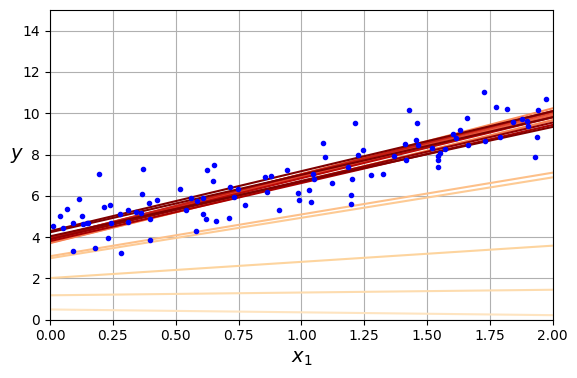

In [24]:
n_epochs = 50
t0, t1 = 5, 50  # learning schedule hyperparameters

def learning_schedule(t):
    return t0 / (t + t1)

np.random.seed(42)
theta = np.random.randn(2, 1)  # random initialization

n_shown = 20  # extra code – just needed to generate the figure below
plt.figure(figsize=(6, 4))  # extra code – not needed, just formatting

for epoch in range(n_epochs):
    for iteration in range(m):

        # extra code – these 4 lines are used to generate the figure
        if epoch == 0 and iteration < n_shown:
            y_predict = X_new_b @ theta
            color = mpl.colors.rgb2hex(plt.cm.OrRd(iteration / n_shown + 0.15))
            plt.plot(X_new, y_predict, color=color)

        random_index = np.random.randint(m)
        xi = X_b[random_index : random_index + 1]
        yi = y[random_index : random_index + 1]
        gradients = 2 * xi.T @ (xi @ theta - yi)  # for SGD, do not divide by m
        eta = learning_schedule(epoch * m + iteration)
        theta = theta - eta * gradients
        theta_path_sgd.append(theta)  # extra code – to generate the figure

# extra code – this section beautifies and saves Figure 4–10
plt.plot(X, y, "b.")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.axis([0, 2, 0, 15])
plt.grid()
save_fig("sgd_plot")
plt.show()

In [25]:
theta

array([[4.21076011],
       [2.74856079]])

**Summary**

* In stochastic gradient descent, random sampling may skip or repeat instances within an epoch, and although shuffling ensures full coverage, it usually does not significantly improve results.

**Key Points**

* In SGD, training instances are selected **randomly**.
* Some instances may be processed **multiple times** in one epoch.
* Other instances may **not be processed at all** during the same epoch.
* To ensure every instance is used once per epoch:

  * Shuffle the training data
  * Iterate through it instance by instance
  * Shuffle again before the next epoch
* Input features and labels must be **shuffled together** to preserve correctness.
* This shuffling-based approach is **more complex** to implement.
* In practice, it **rarely leads to better performance** compared to simple random sampling.


To perform linear regression using stochastic GD with Scikit-Learn, you can
use the SGDRegressor class, which defaults to optimizing the MSE cost
function. The following code runs for maximum 1,000 epochs (max_iter) or
until the loss drops by less than 10 (tol) during 100 epochs–5
(n_iter_no_change). It starts with a learning rate of 0.01 (eta0), using the
default learning schedule (different from the one we used). Lastly, it does not
use any regularization (penalty=None; more details on this shortly)

In [26]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=1000, tol=1e-5, penalty=None, eta0=0.01,
                       n_iter_no_change=100, random_state=42)
sgd_reg.fit(X, y.ravel())  # y.ravel() because fit() expects 1D targets


,"loss loss: str, default='squared_error'The loss function to be used. The possible values are 'squared_error','huber', 'epsilon_insensitive', or 'squared_epsilon_insensitive'The 'squared_error' refers to the ordinary least squares fit.'huber' modifies 'squared_error' to focus less on getting outlierscorrect by switching from squared to linear loss past a distance ofepsilon. 'epsilon_insensitive' ignores errors less than epsilon and islinear past that; this is the loss function used in SVR.'squared_epsilon_insensitive' is the same but becomes squared loss pasta tolerance of epsilon.More details about the losses formulas can be found in the:ref:`User Guide `.",'squared_error'
,"penalty penalty: {'l2', 'l1', 'elasticnet', None}, default='l2'The penalty (aka regularization term) to be used. Defaults to 'l2'which is the standard regularizer for linear SVM models. 'l1' and'elasticnet' might bring sparsity to the model (feature selection)not achievable with 'l2'. No penalty is added when set to `None`.You can see a visualisation of the penalties in:ref:`sphx_glr_auto_examples_linear_model_plot_sgd_penalties.py`.",None
,"alpha alpha: float, default=0.0001Constant that multiplies the regularization term. The higher thevalue, the stronger the regularization. Also used to compute thelearning rate when `learning_rate` is set to 'optimal'.Values must be in the range `[0.0, inf)`.",0.0001
,"l1_ratio l1_ratio: float, default=0.15The Elastic Net mixing parameter, with 0 <= l1_ratio <= 1.l1_ratio=0 corresponds to L2 penalty, l1_ratio=1 to L1.Only used if `penalty` is 'elasticnet'.Values must be in the range `[0.0, 1.0]` or can be `None` if`penalty` is not `elasticnet`... versionchanged:: 1.7 `l1_ratio` can be `None` when `penalty` is not ""elasticnet"".",0.15
,"fit_intercept fit_intercept: bool, default=TrueWhether the intercept should be estimated or not. If False, thedata is assumed to be already centered.",True
,"max_iter max_iter: int, default=1000The maximum number of passes over the training data (aka epochs).It only impacts the behavior in the ``fit`` method, and not the:meth:`partial_fit` method.Values must be in the range `[1, inf)`... versionadded:: 0.19",1000
,"tol tol: float or None, default=1e-3The stopping criterion. If it is not None, training will stopwhen (loss > best_loss - tol) for ``n_iter_no_change`` consecutiveepochs.Convergence is checked against the training loss or thevalidation loss depending on the `early_stopping` parameter.Values must be in the range `[0.0, inf)`... versionadded:: 0.19",1e-05
,"shuffle shuffle: bool, default=TrueWhether or not the training data should be shuffled after each epoch.",True
,"verbose verbose: int, default=0The verbosity level.Values must be in the range `[0, inf)`.",0
,"epsilon epsilon: float, default=0.1Epsilon in the epsilon-insensitive loss functions; only if `loss` is'huber', 'epsilon_insensitive', or 'squared_epsilon_insensitive'.For 'huber', determines the threshold at which it becomes lessimportant to get the prediction exactly right.For epsilon-insensitive, any differences between the current predictionand the correct label are ignored if they are less than this threshold.Values must be in the range `[0.0, inf)`.",0.1
,"random_state random_state: int, RandomState instance, default=NoneUsed for shuffling the data, when ``shuffle`` is set to ``True``.Pass an int for reproducible output across multiple function calls.See :term:`Glossary `.",42


In [27]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.21278812]), array([2.77270267]))

**Summary**

* Stochastic Gradient Descent requires training data to be IID, and shuffling is essential to ensure convergence toward the global optimum.

**Key Points**

* SGD assumes training instances are **independent and identically distributed (IID)**.
* The IID property ensures parameter updates move toward the **global optimum on average**.
* A simple way to maintain IID behavior is to **shuffle the training data** during training.
* Shuffling can be done by:

  * Randomly selecting instances at each step
  * Shuffling the dataset at the start of each epoch
* If instances are **not shuffled** (e.g., sorted by label):

  * SGD will optimize for one label at a time
  * Parameter updates become biased
* Without shuffling, SGD may **fail to converge near the global minimum**.


**Summary**

* Scikit-Learn provides multiple ways to control model training beyond the standard `fit()` method, enabling incremental and continued learning.

**Key Points**

* All Scikit-Learn estimators support training via the **`fit()`** method.
* Some estimators also provide a **`partial_fit()`** method.
* `partial_fit()` performs **one incremental training step** on one or more instances.
* Repeated calls to `partial_fit()` gradually train the model.
* `partial_fit()` **ignores hyperparameters** such as `max_iter` and `tol`.
* Incremental training is useful when **fine-grained control** over the training process is needed.
* Some estimators offer a **`warm_start`** hyperparameter instead of (or in addition to) `partial_fit()`.
* With `warm_start=True`:

  * Calling `fit()` does **not reset the model**
  * Training continues from previous parameter values
* Unlike `partial_fit()`, `fit()` with `warm_start` **respects hyperparameters** like `max_iter` and `tol`.
* `fit()` **resets the iteration counter** used by the learning schedule.
* `partial_fit()` **does not reset** the iteration counter, allowing smooth continuation of learning schedules.


### Mini-batch gradient descent

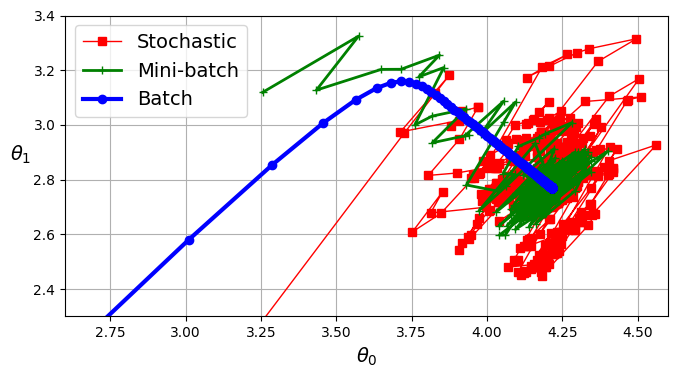

In [28]:
# extra code – this cell generates and saves Figure 4–11

from math import ceil

n_epochs = 50
minibatch_size = 20
n_batches_per_epoch = ceil(m / minibatch_size)

np.random.seed(42)
theta = np.random.randn(2, 1)  # random initialization

t0, t1 = 200, 1000  # learning schedule hyperparameters

def learning_schedule(t):
    return t0 / (t + t1)

theta_path_mgd = []
for epoch in range(n_epochs):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for iteration in range(0, n_batches_per_epoch):
        idx = iteration * minibatch_size
        xi = X_b_shuffled[idx : idx + minibatch_size]
        yi = y_shuffled[idx : idx + minibatch_size]
        gradients = 2 / minibatch_size * xi.T @ (xi @ theta - yi)
        eta = learning_schedule(epoch * n_batches_per_epoch + iteration)
        theta = theta - eta * gradients
        theta_path_mgd.append(theta)

theta_path_bgd = np.array(theta_path_bgd)
theta_path_sgd = np.array(theta_path_sgd)
theta_path_mgd = np.array(theta_path_mgd)

plt.figure(figsize=(7, 4))
plt.plot(theta_path_sgd[:, 0], theta_path_sgd[:, 1], "r-s", linewidth=1,
         label="Stochastic")
plt.plot(theta_path_mgd[:, 0], theta_path_mgd[:, 1], "g-+", linewidth=2,
         label="Mini-batch")
plt.plot(theta_path_bgd[:, 0], theta_path_bgd[:, 1], "b-o", linewidth=3,
         label="Batch")
plt.legend(loc="upper left")
plt.xlabel(r"$\theta_0$")
plt.ylabel(r"$\theta_1$   ", rotation=0)
plt.axis([2.6, 4.6, 2.3, 3.4])
plt.grid()
save_fig("gradient_descent_paths_plot")
plt.show()

**Summary**

* Mini-batch gradient descent combines ideas from batch and stochastic gradient descent, offering a balance between computational efficiency and stable convergence.

**Key Points**

* Mini-batch gradient descent computes gradients using **small random subsets of the training data** called mini-batches.
* It sits between:

  * **Batch GD** (uses the full training set)
  * **Stochastic GD** (uses a single instance)
* A major advantage over stochastic GD is **better computational efficiency** due to optimized matrix operations.
* Mini-batch GD benefits significantly from **hardware acceleration**, especially **GPUs**.
* Parameter updates are **less noisy and erratic** than stochastic GD, particularly with larger mini-batch sizes.
* As a result, mini-batch GD tends to stay **closer to the minimum** compared to stochastic GD.
* However, reduced randomness can make it **harder to escape local minima** in non-convex problems.
* All three methods (batch, stochastic, mini-batch):

  * Eventually reach near the minimum
  * Differ mainly in their optimization paths and speed
* Batch GD stops exactly at the minimum but takes **very slow steps**.
* Stochastic and mini-batch GD continue to **oscillate around the minimum**.
* With a **well-designed learning schedule**, stochastic and mini-batch GD can also converge effectively.


| Algorithm        | Large m | Out-of-core support | Large n | Hyperparams |
|------------------|---------|--------------------|---------|-------------|
| Normal Equation  | Fast    | No                 | Slow    | 0           |
| SVD              | Fast    | No                 | Slow    | 0           |
| Batch GD         | Slow    | No                 | Fast    | 2           |
| Stochastic GD    | Fast    | Yes                | Fast    | ≥ 2         |
| Mini-batch GD    | Fast    | Yes                | Fast    | ≥ 2         |


# Polynomial Regression

What if your data is more complex than a straight line? Surprisingly, you can
use a linear model to fit nonlinear data. A simple way to do this is to add
powers of each feature as new features, then train a linear model on this
extended set of features. This technique is called polynomial regression

In [29]:
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X ** 2 + X + 2 + np.random.randn(m, 1)

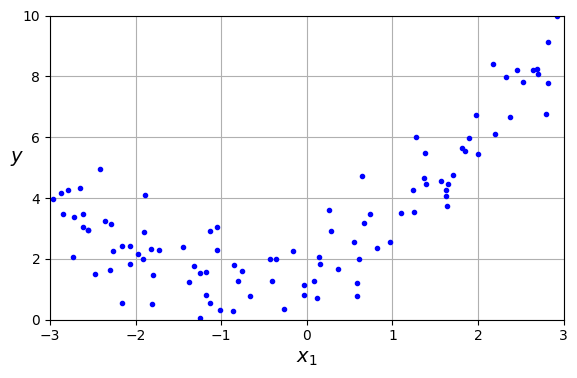

In [30]:
# extra code – this cell generates and saves Figure 4–12
plt.figure(figsize=(6, 4))
plt.plot(X, y, "b.")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.axis([-3, 3, 0, 10])
plt.grid()
save_fig("quadratic_data_plot")
plt.show()

In [31]:
X.shape

(100, 1)

In [32]:
from sklearn.preprocessing import PolynomialFeatures

In [33]:
ploy_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = ploy_features.fit_transform(X)

In [34]:
X[0]

array([-0.75275929])

In [35]:
X_poly[0]

array([-0.75275929,  0.56664654])

X_poly now contains the original feature of X plus the square of this feature.

In [36]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [37]:
lin_reg.intercept_ , lin_reg.coef_

(array([1.78134581]), array([[0.93366893, 0.56456263]]))

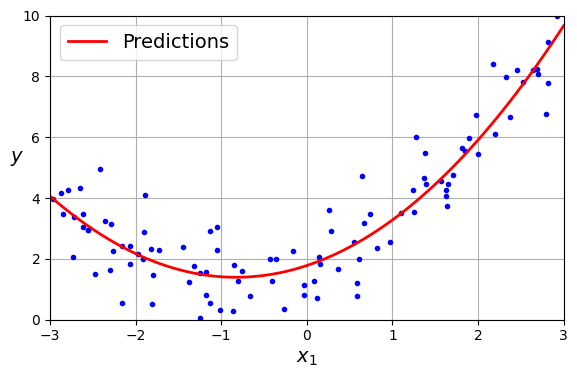

In [38]:
# extra code – this cell generates and saves Figure 4–13

X_new = np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = ploy_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)

plt.figure(figsize=(6, 4))
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.legend(loc="upper left")
plt.axis([-3, 3, 0, 10])
plt.grid()
save_fig("quadratic_predictions_plot")
plt.show()

Not bad: the model estimates y ^ = 0.56 x 1 2 + 0.93 x 1 + 1.78 when in fact
the original function was y = 0.5 x 1 2 + 1.0 x 1 + 2.0 + Gaussian noise .

**Summary**

* Polynomial regression can model complex relationships between multiple features by generating higher-degree terms and feature combinations.

**Key Points**

* Plain linear regression cannot capture interactions between multiple features.
* **Polynomial regression** overcomes this by expanding features into polynomial terms.
* `PolynomialFeatures` generates:

  * Higher powers of each feature
  * Combinations (interaction terms) between features
* For two features **a** and **b** with `degree=3`, generated features include:

  * Individual powers: **a², a³, b², b³**
  * Interaction terms: **ab, a²b, ab²**
* This allows the model to learn **nonlinear relationships** while still using a linear model underneath.
* The number of generated features grows **combinatorially**.
* `PolynomialFeatures(degree=d)` transforms **n features** into:

  * ((n + d)! / (d! , n!)) features
* This rapid growth can lead to:

  * High memory usage
  * Slower training
  * Overfitting if not handled carefully
* Feature explosion is a major risk when using high polynomial degrees.


# Learning Curve

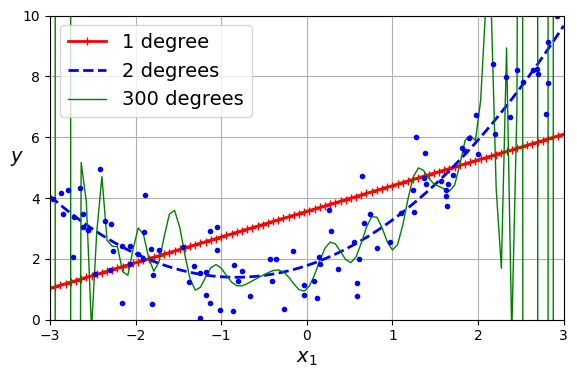

In [39]:
# extra code – this cell generates and saves Figure 4–14

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

plt.figure(figsize=(6, 4))

for style, width, degree in (("r-+", 2, 1), ("b--", 2, 2), ("g-", 1, 300)):
    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = make_pipeline(polybig_features, std_scaler, lin_reg)
    polynomial_regression.fit(X, y)
    y_newbig = polynomial_regression.predict(X_new)
    label = f"{degree} degree{'s' if degree > 1 else ''}"
    plt.plot(X_new, y_newbig, style, label=label, linewidth=width)

plt.plot(X, y, "b.", linewidth=3)
plt.legend(loc="upper left")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.axis([-3, 3, 0, 10])
plt.grid()
save_fig("high_degree_polynomials_plot")
plt.show()

**Summary**

* Model complexity strongly affects bias and variance, and cross-validation helps identify whether a model is underfitting or overfitting.

**Key Points**

* High-degree polynomial regression can fit training data extremely well.
* Very high-degree models (e.g., degree 300) tend to **overfit**, closely following noise in the training data.
* Plain linear regression may be **too simple**, leading to **underfitting**.
* A moderately complex model (e.g., quadratic) can **generalize best** when it matches the true underlying pattern.
* In real-world problems, the true data-generating function is usually **unknown**.
* Choosing the right model complexity is therefore nontrivial.
* **Cross-validation** is used to estimate a model’s generalization performance.
* If a model:

  * Performs well on training data but poorly in cross-validation → **overfitting**
  * Performs poorly on both training and validation data → **underfitting**
* Cross-validation helps determine whether a model is **too simple or too complex**.


**Summary**

* Learning curves visualize training and validation errors over training progress and help diagnose underfitting and overfitting.

**Key Points**

* **Learning curves** plot training error and validation error versus training progress.
* Errors can be plotted against:

  * Training iterations
  * Training set size
* Models are evaluated at **regular intervals** on both training and validation sets.
* If a model **cannot be trained incrementally**:

  * It must be retrained multiple times
  * Each time using a **larger subset** of the training data
* Scikit-Learn provides the **`learning_curve()`** function to automate this process.
* `learning_curve()`:

  * Uses **cross-validation** for evaluation
  * Trains the model on **increasing training set sizes** by default
* If the model supports incremental learning:

  * Set `exploit_incremental_learning=True`
  * The model will be trained **incrementally** instead of retrained from scratch
* The function returns:

  * Training set sizes
  * Training scores
  * Validation scores
  * Scores for each cross-validation fold
* Learning curves help diagnose:

  * **Underfitting** (high error on both curves)
  * **Overfitting** (low training error, high validation error)


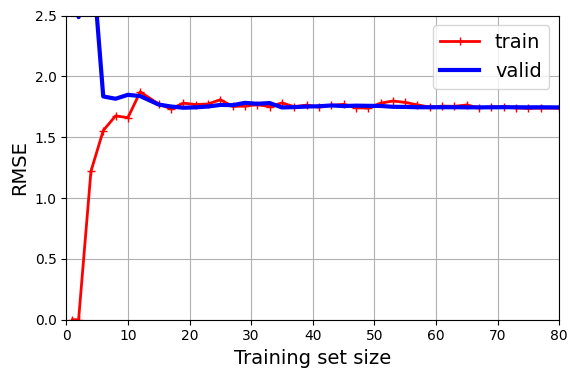

In [40]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, valid_scores = learning_curve(
    LinearRegression(), X, y, train_sizes=np.linspace(0.01, 1.0, 40), cv=5,
    scoring="neg_root_mean_squared_error")
train_errors = -train_scores.mean(axis=1)
valid_errors = -valid_scores.mean(axis=1)

plt.figure(figsize=(6, 4))  # extra code – not needed, just formatting
plt.plot(train_sizes, train_errors, "r-+", linewidth=2, label="train")
plt.plot(train_sizes, valid_errors, "b-", linewidth=3, label="valid")

# extra code – beautifies and saves Figure 4–15
plt.xlabel("Training set size")
plt.ylabel("RMSE")
plt.grid()
plt.legend(loc="upper right")
plt.axis([0, 80, 0, 2.5])
save_fig("underfitting_learning_curves_plot")

plt.show()

**Summary**

* The learning curves indicate underfitting, showing that the model is too simple to capture the underlying data patterns.

**Key Points**

* With very few training instances, the model can fit the data perfectly, so training error starts near zero.
* As more training data is added:

  * Noise increases
  * The true relationship (nonlinear) cannot be captured by a linear model
* Training error rises and eventually reaches a **plateau**.
* Adding more training instances after this point does not significantly improve training error.
* Validation error is initially high due to poor generalization with little data.
* As training data increases, validation error decreases gradually.
* Validation error also reaches a **plateau**, close to the training error.
* Both curves being **close and relatively high** is a clear sign of **underfitting**.
* This pattern indicates the model lacks sufficient complexity.
* Adding more data **will not fix underfitting**.
* To address underfitting:

  * Use a **more complex model**
  * Engineer **better or more informative features**


In [41]:
from sklearn.pipeline import make_pipeline

polynomial_regression = make_pipeline(
    PolynomialFeatures(degree=10, include_bias=False),
    LinearRegression())

train_sizes, train_scores, valid_scores = learning_curve(
    polynomial_regression, X, y, train_sizes=np.linspace(0.01, 1.0, 40), cv=5,
    scoring="neg_root_mean_squared_error")

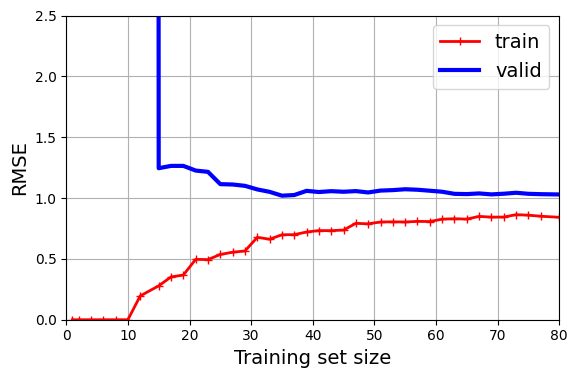

In [42]:
# extra code – generates and saves Figure 4–16

train_errors = -train_scores.mean(axis=1)
valid_errors = -valid_scores.mean(axis=1)

plt.figure(figsize=(6, 4))
plt.plot(train_sizes, train_errors, "r-+", linewidth=2, label="train")
plt.plot(train_sizes, valid_errors, "b-", linewidth=3, label="valid")
plt.legend(loc="upper right")
plt.xlabel("Training set size")
plt.ylabel("RMSE")
plt.grid()
plt.axis([0, 80, 0, 2.5])
save_fig("learning_curves_plot")
plt.show()

These learning curves look a bit like the previous ones, but there are two very
important differences:
1. The error on the training data is much lower than before.
2. There is a gap between the curves. This means that the model performs
significantly better on the training data than on the validation data,
which is the hallmark of an overfitting model. If you used a much larger
training set, however, the two curves would continue to get closer.
>TIP
One way to improve an overfitting model is to feed it more training data until the
validation error reaches the training error.

**Summary**

* The bias–variance trade-off explains how model complexity affects generalization error through bias, variance, and irreducible error.

**Key Points**

* A model’s **generalization error** can be decomposed into three components.
* **Bias**:

  * Caused by incorrect assumptions about the data.
  * Example: assuming linearity when the true relationship is quadratic.
  * High bias leads to **underfitting**.
* **Variance**:

  * Caused by excessive sensitivity to small changes in training data.
  * Models with many degrees of freedom (e.g., high-degree polynomials) tend to have high variance.
  * High variance leads to **overfitting**.
* **Irreducible error**:

  * Comes from inherent noise in the data.
  * Cannot be reduced by changing the model.
  * Can only be reduced by improving data quality (e.g., fixing sensors, removing outliers).
* Increasing model complexity:

  * **Decreases bias**
  * **Increases variance**
* Decreasing model complexity:

  * **Increases bias**
  * **Decreases variance**
* This opposing behavior between bias and variance is known as the **bias–variance trade-off**.


# Regularized Linear Models

 a good way to reduce overfitting is to
regularize the model (i.e., to constrain it): the fewer degrees of freedom it
has, the harder it will be for it to overfit the data. A simple way to regularize
a polynomial model is to reduce the number of polynomial degrees.
For a linear model, regularization is typically achieved by constraining the
weights of the model. We will now look at ridge regression, lasso regression,
and elastic net regression, which implement three different ways to constrain
the weights

## Ridge Regression

**Summary**

* Ridge regression adds an L2 regularization term to linear regression to reduce overfitting by constraining model weights.

**Key Points**

* **Ridge regression** is a regularized form of linear regression.
* It is also known as **Tikhonov regularization**.
* A **regularization term** is added to the MSE cost function during training.
* The regularization term penalizes **large model weights**.
* This encourages the model to:

  * Fit the data
  * Keep parameter values small
* The regularization strength is controlled by **α**.
* The penalty term is proportional to the **sum of squared weights**.
* Regularization is applied **only during training**.
* Model evaluation should use the **unregularized MSE or RMSE**.
* This helps improve **generalization** while preventing overfitting.



$$
J(\theta)
\text{MSE}(\theta)
+
\frac{\alpha}{m}
\sum_{i=1}^{n}
\theta_i^{2}
$$

**Summary**

* Ridge regression regularizes only the feature weights (not the bias), adds an ℓ₂ penalty scaled by ( \alpha/m ), and requires feature scaling for effective optimization.

**Key Points**

* The **bias term ( $\theta_0$ )** is **not regularized** (the sum starts at ( i=1 )).
* Let **( $\mathbf{w}$ = $(\theta_1, \ldots, \theta_n) )$** be the vector of feature weights.
* The regularization term equals **$( \frac{\alpha}{m}\lVert \mathbf{w} \rVert_2^2 )$**.
* For **batch gradient descent**:

  * Add **$( \frac{2\alpha}{m}\mathbf{w} )$** to the gradient components of the **feature weights**.
  * **Do not** add anything to the **bias** gradient.
* **Feature scaling** (e.g., standardization) is crucial; ridge regression is **sensitive to feature scale**.

**Formulas (notebook-ready)**

$$
\text{Regularization term} ;=; \frac{\alpha}{m}\lVert \mathbf{w} \rVert_2^2
$$

$$
\nabla_{\mathbf{w}} J(\theta)
;=;
\nabla_{\mathbf{w}} \text{MSE}(\theta)
;+;
\frac{2\alpha}{m}\mathbf{w}
$$

$$
\frac{\partial J(\theta)}{\partial \theta_0}
;=;
\frac{\partial \text{MSE}(\theta)}{\partial \theta_0}
\quad (\text{no regularization})
$$


**Summary**

* Ridge regression controls model complexity through the regularization strength $( \alpha )$, trading variance for bias, especially evident in polynomial regression on noisy data.

**Key Points**

* Multiple ridge models are trained on **very noisy linear data** using different values of **$( \alpha )$**.
* **Left side**:

  * Plain ridge regression is applied.
  * Predictions remain **linear**.
* **Right side**:

  * Data is expanded using **PolynomialFeatures(degree=10)**.
  * Features are scaled using **StandardScaler**.
  * Ridge regression is applied to the transformed features.
  * This setup corresponds to **polynomial regression with ridge regularization**.
* Increasing **$( \alpha )$**:

  * Produces **flatter, less extreme predictions**.
  * **Reduces variance** (less sensitivity to noise).
  * **Increases bias** (stronger constraints on the model).
* Ridge regularization helps prevent overfitting by **shrinking model weights**, especially in high-degree polynomial models.
* Feature scaling is essential when using ridge regression, particularly with polynomial features.


In [43]:
# extra code – we've done this type of generation several times before
np.random.seed(42)
m = 20
X = 3 * np.random.rand(m, 1)
y = 1 + 0.5 * X + np.random.randn(m, 1) / 1.5
X_new = np.linspace(0, 3, 100).reshape(100, 1)

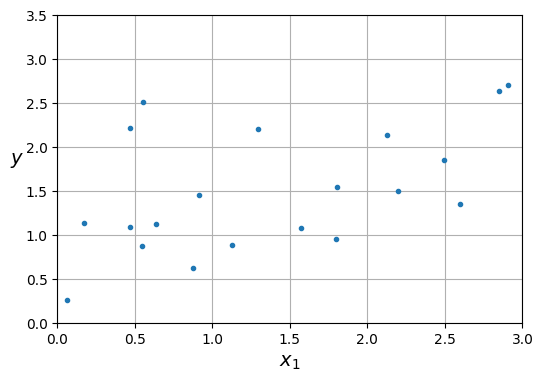

In [44]:
# extra code – a quick peek at the dataset we just generated
plt.figure(figsize=(6, 4))
plt.plot(X, y, ".")
plt.xlabel("$x_1$")
plt.ylabel("$y$  ", rotation=0)
plt.axis([0, 3, 0, 3.5])
plt.grid()
plt.show()

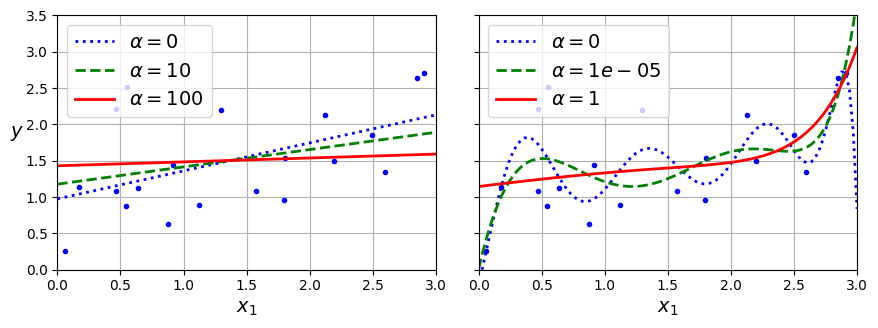

In [47]:
# extra code – this cell generates and saves Figure 4–17
from sklearn.linear_model import Ridge
def plot_model(model_class, polynomial, alphas, **model_kwargs):
    plt.plot(X, y, "b.", linewidth=3)
    for alpha, style in zip(alphas, ("b:", "g--", "r-")):
        if alpha > 0:
            model = model_class(alpha, **model_kwargs)
        else:
            model = LinearRegression()
        if polynomial:
            model = make_pipeline(
                PolynomialFeatures(degree=10, include_bias=False),
                StandardScaler(),
                model)
        model.fit(X, y)
        y_new_regul = model.predict(X_new)
        plt.plot(X_new, y_new_regul, style, linewidth=2,
                 label=fr"$\alpha = {alpha}$")
    plt.legend(loc="upper left")
    plt.xlabel("$x_1$")
    plt.axis([0, 3, 0, 3.5])
    plt.grid()

plt.figure(figsize=(9, 3.5))
plt.subplot(121)
plot_model(Ridge, polynomial=False, alphas=(0, 10, 100), random_state=42)
plt.ylabel("$y$  ", rotation=0)
plt.subplot(122)
plot_model(Ridge, polynomial=True, alphas=(0, 10**-5, 1), random_state=42)
plt.gca().axes.yaxis.set_ticklabels([])
save_fig("ridge_regression_plot")
plt.show()

**Summary**

* Ridge regression can be trained using either a closed-form solution or gradient descent, with the same trade-offs as linear regression.

**Key Points**

* Ridge regression supports **two training approaches**:

  * Closed-form solution
  * Gradient descent
* The **advantages and disadvantages** of these approaches are the same as for linear regression.
* The **closed-form solution** modifies the Normal Equation by adding a regularization term.
* The solution is given by:

  * $( \hat{\theta} = (X^{T}X + \alpha A)^{-1} X^{T}y )$
* **A** is an $((n+1) \times (n+1))$ identity matrix.
* The **top-left element of A is set to 0** so that the **bias term is not regularized**.
* This formulation incorporates **L2 regularization** directly into the parameter computation.
* Scikit-Learn implements ridge regression using an efficient **matrix factorization technique**.
* Specifically, it uses a variant based on **Cholesky decomposition** rather than directly computing the matrix inverse.


In [48]:
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha=0.1, solver="cholesky")
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([1.55325833])

In [49]:
sgd_reg = SGDRegressor(penalty="l2", alpha=0.1 / m, tol=None,
                       max_iter=1000, eta0=0.01, random_state=42)
sgd_reg.fit(X, y.ravel())  # y.ravel() because fit() expects 1D targets
sgd_reg.predict([[1.5]])

array([1.55302613])

In [50]:
# extra code – show that we get roughly the same solution as earlier when
#              we use Stochastic Average GD (solver="sag")
ridge_reg = Ridge(alpha=0.1, solver="sag", random_state=42)
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([1.55326019])

In [51]:
# extra code – shows the closed form solution of Ridge regression,
#              compare with the next Ridge model's learned parameters below
alpha = 0.1
A = np.array([[0., 0.], [0., 1.]])
X_b = np.c_[np.ones(m), X]
np.linalg.inv(X_b.T @ X_b + alpha * A) @ X_b.T @ y

array([[0.97898394],
       [0.3828496 ]])

In [52]:
ridge_reg.intercept_, ridge_reg.coef_  # extra code

(array([0.97896386]), array([0.38286422]))

**Summary**

* The penalty hyperparameter in SGD controls the regularization type, and using ℓ₂ regularization makes SGD behave like ridge regression, with careful scaling of α.

**Key Points**

* The **penalty hyperparameter** determines the type of regularization applied.
* Setting `penalty="l2"` adds an **ℓ₂ regularization term** to the MSE cost function.
* The ℓ₂ penalty is equal to **α times the squared ℓ₂ norm of the weight vector**.
* This regularization is equivalent to **ridge regression**.
* Unlike ridge regression, **SGD’s ℓ₂ penalty is not divided by m**.
* To match `Ridge(alpha=0.1)`, α must be scaled as **`alpha = 0.1 / m`** in SGD.
* **RidgeCV** performs ridge regression with **automatic hyperparameter tuning** using cross-validation.
* RidgeCV is similar to `GridSearchCV` but:

  * Optimized specifically for ridge regression
  * **Much faster**
* Other linear models also provide efficient CV-based variants, such as:

  * **LassoCV**
  * **ElasticNetCV**


## Lasso Regression

**Summary**

* Lasso regression is a regularized linear regression method that uses an ℓ₁ penalty, encouraging sparse models by driving some feature weights exactly to zero.

**Key Points**

* **Lasso regression** stands for *Least Absolute Shrinkage and Selection Operator*.
* It is a **regularized version of linear regression**, similar to ridge regression.
* Lasso adds a **regularization term** to the cost function.
* Instead of the squared ℓ₂ norm (ridge), it uses the **ℓ₁ norm** of the weight vector.
* The ℓ₁ norm penalty is proportional to the **sum of absolute values of the weights**.
* The regularization term is multiplied by **α** (with a different scaling than ridge).
* Different scaling factors are used so that the **optimal α does not depend on training set size**.
* A key property of lasso is **feature selection**:

  * Some weights are driven exactly to **zero**
  * This results in a **sparser model**
* Lasso is especially useful when many features are irrelevant.
* The Lasso cost function is:

  * $$ J(\theta) = \text{MSE}(\theta) + \alpha \sum_{i=1}^{n} |\theta_i| $$



**L2 (Ridge) regularization**
$$
J(\theta) =
\text{MSE}(\theta)
+
\frac{\alpha}{m}
\sum_{i=1}^{n}
\theta_i^{2}
$$

**L1 (Lasso) regularization**
$$
J(\theta) =
\text{MSE}(\theta)
+
\alpha
\sum_{i=1}^{n}
\lvert \theta_i \rvert
$$


In [53]:
from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([1.53788174])

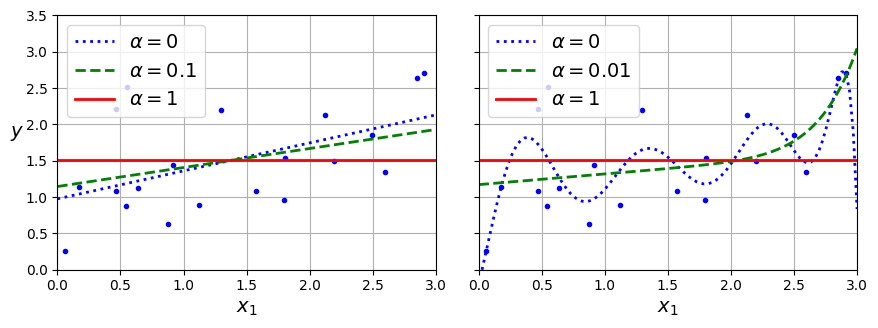

In [55]:
# extra code – this cell generates and saves Figure 4–18
plt.figure(figsize=(9, 3.5))
plt.subplot(121)
plot_model(Lasso, polynomial=False, alphas=(0, 0.1, 1), random_state=42)
plt.ylabel("$y$  ", rotation=0)
plt.subplot(122)
plot_model(Lasso, polynomial=True, alphas=(0, 1e-2, 1), random_state=42)
plt.gca().axes.yaxis.set_ticklabels([])
save_fig("lasso_regression_plot")
plt.show()

**Summary**

* Lasso regression encourages sparsity by driving less important feature weights exactly to zero, effectively performing automatic feature selection.

**Key Points**

* Lasso regression tends to **eliminate insignificant features** by setting their weights to zero.
* This results in a **sparse model** with only a few nonzero coefficients.
* In polynomial regression, lasso can zero out **high-degree feature weights**, leaving a simpler model.
* Because of this behavior, lasso performs **automatic feature selection**.
* The ℓ₁ penalty creates **linear loss contours** that intersect the axes.
* During gradient descent, parameters are pulled equally toward zero.
* Weights that are closer to zero reach **exactly zero first**.
* Once a weight becomes zero, optimization continues along that axis (the “gutter”).
* In lasso’s full cost function (MSE + ℓ₁ penalty), the optimization path often:

  * Quickly reaches zero for some parameters
  * Then converges near the global minimum
* Increasing **α**:

  * Strengthens regularization
  * Pushes more weights to zero
* Decreasing **α**:

  * Moves the solution closer to the unregularized model
* This geometric behavior explains why lasso produces **sparse, interpretable models**.


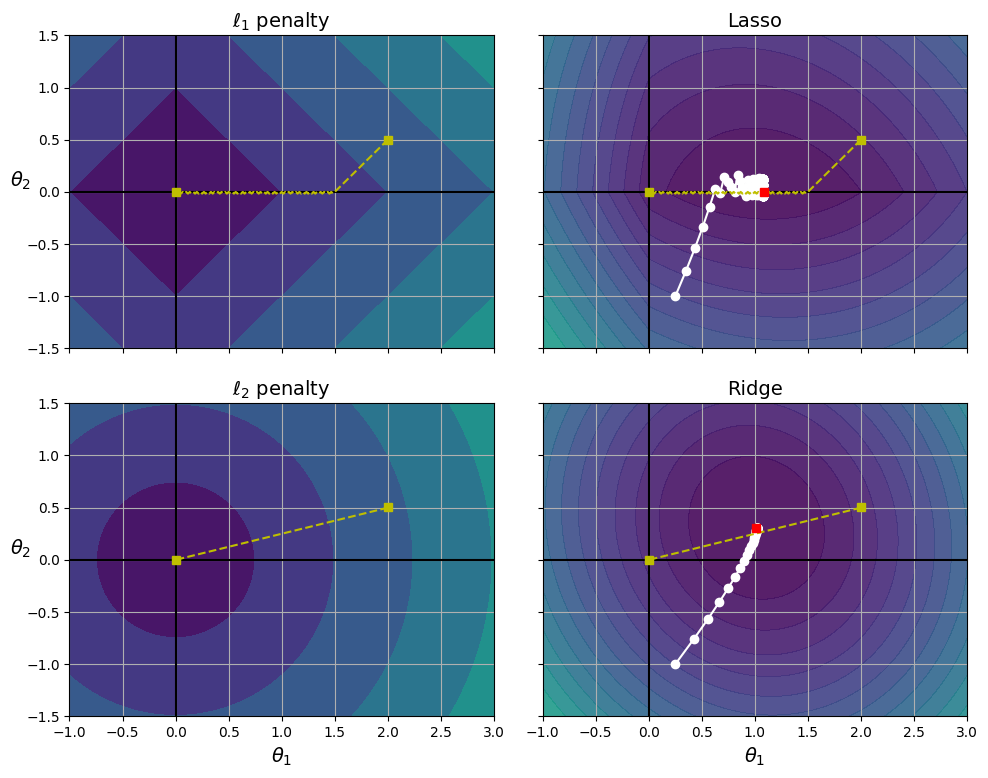

In [56]:
# extra code – this BIG cell generates and saves Figure 4–19

t1a, t1b, t2a, t2b = -1, 3, -1.5, 1.5

t1s = np.linspace(t1a, t1b, 500)
t2s = np.linspace(t2a, t2b, 500)
t1, t2 = np.meshgrid(t1s, t2s)
T = np.c_[t1.ravel(), t2.ravel()]
Xr = np.array([[1, 1], [1, -1], [1, 0.5]])
yr = 2 * Xr[:, :1] + 0.5 * Xr[:, 1:]

J = (1 / len(Xr) * ((T @ Xr.T - yr.T) ** 2).sum(axis=1)).reshape(t1.shape)

N1 = np.linalg.norm(T, ord=1, axis=1).reshape(t1.shape)
N2 = np.linalg.norm(T, ord=2, axis=1).reshape(t1.shape)

t_min_idx = np.unravel_index(J.argmin(), J.shape)
t1_min, t2_min = t1[t_min_idx], t2[t_min_idx]

t_init = np.array([[0.25], [-1]])

def bgd_path(theta, X, y, l1, l2, core=1, eta=0.05, n_iterations=200):
    path = [theta]
    for iteration in range(n_iterations):
        gradients = (core * 2 / len(X) * X.T @ (X @ theta - y)
                     + l1 * np.sign(theta) + l2 * theta)
        theta = theta - eta * gradients
        path.append(theta)
    return np.array(path)

fig, axes = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(10.1, 8))

for i, N, l1, l2, title in ((0, N1, 2.0, 0, "Lasso"), (1, N2, 0, 2.0, "Ridge")):
    JR = J + l1 * N1 + l2 * 0.5 * N2 ** 2

    tr_min_idx = np.unravel_index(JR.argmin(), JR.shape)
    t1r_min, t2r_min = t1[tr_min_idx], t2[tr_min_idx]

    levels = np.exp(np.linspace(0, 1, 20)) - 1
    levelsJ = levels * (J.max() - J.min()) + J.min()
    levelsJR = levels * (JR.max() - JR.min()) + JR.min()
    levelsN = np.linspace(0, N.max(), 10)

    path_J = bgd_path(t_init, Xr, yr, l1=0, l2=0)
    path_JR = bgd_path(t_init, Xr, yr, l1, l2)
    path_N = bgd_path(theta=np.array([[2.0], [0.5]]), X=Xr, y=yr,
                      l1=np.sign(l1) / 3, l2=np.sign(l2), core=0)
    ax = axes[i, 0]
    ax.grid()
    ax.axhline(y=0, color="k")
    ax.axvline(x=0, color="k")
    ax.contourf(t1, t2, N / 2.0, levels=levelsN)
    ax.plot(path_N[:, 0], path_N[:, 1], "y--")
    ax.plot(0, 0, "ys")
    ax.plot(t1_min, t2_min, "ys")
    ax.set_title(fr"$\ell_{i + 1}$ penalty")
    ax.axis([t1a, t1b, t2a, t2b])
    if i == 1:
        ax.set_xlabel(r"$\theta_1$")
    ax.set_ylabel(r"$\theta_2$", rotation=0)

    ax = axes[i, 1]
    ax.grid()
    ax.axhline(y=0, color="k")
    ax.axvline(x=0, color="k")
    ax.contourf(t1, t2, JR, levels=levelsJR, alpha=0.9)
    ax.plot(path_JR[:, 0], path_JR[:, 1], "w-o")
    ax.plot(path_N[:, 0], path_N[:, 1], "y--")
    ax.plot(0, 0, "ys")
    ax.plot(t1_min, t2_min, "ys")
    ax.plot(t1r_min, t2r_min, "rs")
    ax.set_title(title)
    ax.axis([t1a, t1b, t2a, t2b])
    if i == 1:
        ax.set_xlabel(r"$\theta_1$")

save_fig("lasso_vs_ridge_plot")
plt.show()

**Summary**

* Ridge regression behaves differently from lasso during optimization because the ℓ₂ penalty smoothly pulls parameters toward zero without forcing them to become exactly zero.

**Key Points**

* With an **ℓ₂ penalty**, the loss decreases smoothly as parameters move toward the **origin**.
* In the ℓ₂-only loss case, gradient descent follows a **straight path toward the origin**.
* For **ridge regression** (MSE + ℓ₂ penalty):

  * Gradient magnitudes **decrease near the optimum**
  * Gradient descent **naturally slows down**
* This smooth behavior:

  * Reduces oscillations near the minimum
  * Helps ridge regression **converge faster** than lasso
* Unlike lasso:

  * Ridge regression **does not set weights exactly to zero**
* As **α increases**:

  * Optimal parameters move **closer to the origin**
  * Coefficients are **shrunk**, but **never fully eliminated**
* This explains why ridge regression:

  * Reduces variance
  * Keeps all features
  * Produces **non-sparse** but more stable models


> To keep gradient descent from bouncing around the optimum at the end when using lasso
regression, you need to gradually reduce the learning rate during training. It will still
bounce around the optimum, but the steps will get smaller and smaller, so it will converge.

**Summary**

* Although the lasso cost function is not differentiable at zero, gradient descent can still be applied using subgradients.

**Key Points**

* The **lasso cost function** is **not differentiable at ( \theta_i = 0 )**.
* Standard gradients cannot be used at these points.
* Instead, **subgradients** are used to continue optimization.
* Gradient descent works with lasso by replacing the gradient of the ℓ₁ term with a **subgradient vector**.
* The subgradient adds a term based on the **sign** of each parameter.
* This allows parameters to reach **exactly zero**, enabling sparsity and feature selection.
* The subgradient approach is sufficient for convergence in practice.

**Formula (notebook-ready)**

$$
\mathbf{g}_{\theta} J(\theta) =
\nabla_{\theta},\text{MSE}(\theta)
+
\alpha
\begin{bmatrix}
\operatorname{sign}(\theta_1) \
\operatorname{sign}(\theta_2) \
\vdots \
\operatorname{sign}(\theta_n)
\end{bmatrix}
$$

where

$$
\operatorname{sign}(\theta_i) =
\begin{cases}
(-1 & \text{if } \theta_i < 0) \
(0  & \text{if } \theta_i = 0) \
(+1 & \text{if } \theta_i > 0)
\end{cases}
$$


## Elastic Net

In [57]:
from sklearn.linear_model import ElasticNet

elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([1.54333232])

**Summary**

* Elastic Net regression combines ridge and lasso regularization, balancing coefficient shrinkage and feature selection through a mixing parameter.

**Key Points**

* **Elastic Net** is a hybrid of **ridge (ℓ₂)** and **lasso (ℓ₁)** regression.
* Its regularization term is a **weighted sum** of ℓ₁ and ℓ₂ penalties.
* The **mixing ratio ( r )** controls the balance:

  * ( r = 0 ) → equivalent to **ridge regression**
  * ( r = 1 ) → equivalent to **lasso regression**
* Elastic Net helps when:

  * Only a few features are truly useful
  * Features are **strongly correlated**
  * The number of features **exceeds** the number of training instances
* Plain linear regression (no regularization) is usually **not recommended**.
* **Ridge** is a good default choice.
* **Lasso** and **Elastic Net** are preferred when feature selection is desired.
* Elastic Net is generally preferred over lasso due to **more stable behavior**.

**Formula (notebook-ready)**

$$
J(\theta) = 
\text{MSE}(\theta)
+
r,\alpha \sum_{i=1}^{n} \lvert \theta_i \rvert
+
\frac{1-r}{2}\alpha \sum_{i=1}^{n} \theta_i^{2}
$$


| Aspect                            | Ridge Regression (L2)              | Lasso Regression (L1)             | Elastic Net                             |   |                        |
| --------------------------------- | ---------------------------------- | --------------------------------- | --------------------------------------- | - | ---------------------- |
| Regularization term               | $( \sum \theta_i^2 ) $               | ( \sum                            | \theta_i                                | ) | Combination of L1 + L2 |
| Shrinks coefficients              | ✅ Yes                              | ✅ Yes                             | ✅ Yes                                   |   |                        |
| Sets coefficients exactly to zero | ❌ No                               | ✅ Yes                             | ✅ Yes (can)                             |   |                        |
| Feature selection                 | ❌ No                               | ✅ Automatic                       | ✅ Automatic                             |   |                        |
| Sparsity                          | Low (dense model)                  | High (sparse model)               | Medium                                  |   |                        |
| Handles correlated features       | ❌ Poor (keeps all)                 | ❌ Unstable                        | ✅ Good                                  |   |                        |
| Behavior when (n > m)             | ✅ Stable                           | ❌ Can be unstable                 | ✅ Stable                                |   |                        |
| Bias–variance trade-off           | Reduces variance                   | Reduces variance + increases bias | Balanced                                |   |                        |
| Best use case                     | Default choice, many small effects | Few important features            | Correlated features + feature selection |   |                        |


- Ridge → Shrink everything, keep everything
- Lasso → Kill useless features
- Elastic Net → Shrink + select, more stable than lasso

## Early Stopping

In [58]:
try:
    from sklearn.metrics import root_mean_squared_error
except ImportError:
    from sklearn.metrics import mean_squared_error

    def root_mean_squared_error(labels, predictions):
        return mean_squared_error(labels, predictions, squared=False)

**Summary**

* Early stopping is a simple and effective regularization technique that prevents overfitting by halting training when validation error stops improving.

**Key Points**

* Early stopping is used with **iterative learning algorithms** like gradient descent.
* Training is stopped when the **validation error reaches its minimum**.
* During training:

  * Training error keeps decreasing.
  * Validation error decreases at first, then starts increasing.
* An increasing validation error indicates **overfitting** has begun.
* Early stopping prevents the model from fitting noise in the training data.
* It works especially well for **complex models** (e.g., high-degree polynomial regression).
* No explicit regularization term is added to the cost function.
* It is computationally efficient and easy to implement.
* Geoffrey Hinton referred to early stopping as a **“beautiful free lunch”** because it improves generalization at almost no cost.


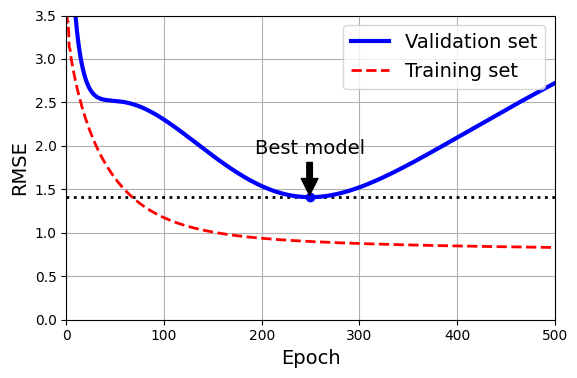

In [59]:
from copy import deepcopy
from sklearn.preprocessing import StandardScaler

# extra code – creates the same quadratic dataset as earlier and splits it
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X ** 2 + X + 2 + np.random.randn(m, 1)
X_train, y_train = X[: m // 2], y[: m // 2, 0]
X_valid, y_valid = X[m // 2 :], y[m // 2 :, 0]

preprocessing = make_pipeline(PolynomialFeatures(degree=90, include_bias=False),
                              StandardScaler())
X_train_prep = preprocessing.fit_transform(X_train)
X_valid_prep = preprocessing.transform(X_valid)
sgd_reg = SGDRegressor(penalty=None, eta0=0.002, random_state=42)
n_epochs = 500
best_valid_rmse = float('inf')
train_errors, val_errors = [], []  # extra code – it's for the figure below

for epoch in range(n_epochs):
    sgd_reg.partial_fit(X_train_prep, y_train)
    y_valid_predict = sgd_reg.predict(X_valid_prep)
    val_error = root_mean_squared_error(y_valid, y_valid_predict)
    if val_error < best_valid_rmse:
        best_valid_rmse = val_error
        best_model = deepcopy(sgd_reg)

    # extra code – we evaluate the train error and save it for the figure
    y_train_predict = sgd_reg.predict(X_train_prep)
    train_error = root_mean_squared_error(y_train, y_train_predict)
    val_errors.append(val_error)
    train_errors.append(train_error)

# extra code – this section generates and saves Figure 4–20
best_epoch = np.argmin(val_errors)
plt.figure(figsize=(6, 4))
plt.annotate('Best model',
             xy=(best_epoch, best_valid_rmse),
             xytext=(best_epoch, best_valid_rmse + 0.5),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.05))
plt.plot([0, n_epochs], [best_valid_rmse, best_valid_rmse], "k:", linewidth=2)
plt.plot(val_errors, "b-", linewidth=3, label="Validation set")
plt.plot(best_epoch, best_valid_rmse, "bo")
plt.plot(train_errors, "r--", linewidth=2, label="Training set")
plt.legend(loc="upper right")
plt.xlabel("Epoch")
plt.ylabel("RMSE")
plt.axis([0, n_epochs, 0, 3.5])
plt.grid()
save_fig("early_stopping_plot")
plt.show()

> With stochastic and mini-batch gradient descent, the curves are not so smooth, and it may
be hard to know whether you have reached the minimum or not. One solution is to stop
only after the validation error has been above the minimum for some time (when you are
confident that the model will not do any better), then roll back the model parameters to the
point where the validation error was at a minimum

# Logistic Regression

> can aslo be used aas binnary classifier

**Summary**

* *Logit* and *logistic* are two closely related concepts used in logistic regression: one maps probabilities to real numbers, the other maps real numbers to probabilities.

**Key Points**

* **Logistic (sigmoid) function**:

  * Converts any real value into a probability between 0 and 1.
  * Used to model the probability of the positive class.
* **Logit function**:

  * Is the inverse of the logistic function.
  * Converts a probability into log-odds (a real number).
* In **logistic regression**:

  * The model computes a linear score ( z = \theta^T x ).
  * The **logistic function** turns ( z ) into a probability.
  * The **logit** represents the linear score in terms of odds.

**Formulas (notebook-ready)**

Logistic (sigmoid) function:
$$
\sigma(z) = \frac{1}{1 + e^{-z}}
$$

Logit function (log-odds):
$$
\text{logit}(p) = \log\left(\frac{p}{1 - p}\right)
$$

Relationship between them:
$$
p = \sigma(z)
\quad \Longleftrightarrow \quad
z = \text{logit}(p)
$$

**One-line intuition**

* **Logistic**: *real number → probability*
* **Logit**: *probability → real number (log-odds)*


## Estimating Probabilities

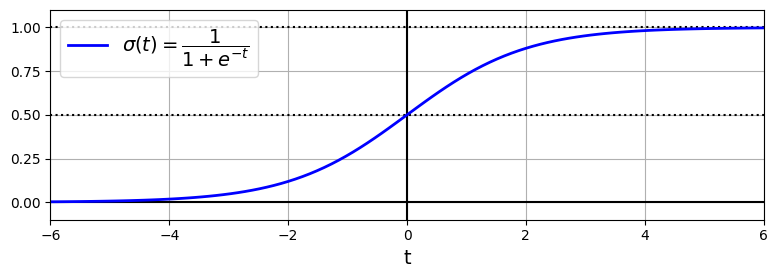

In [60]:
# extra code – generates and saves Figure 4–21

lim = 6
t = np.linspace(-lim, lim, 100)
sig = 1 / (1 + np.exp(-t))

plt.figure(figsize=(8, 3))
plt.plot([-lim, lim], [0, 0], "k-")
plt.plot([-lim, lim], [0.5, 0.5], "k:")
plt.plot([-lim, lim], [1, 1], "k:")
plt.plot([0, 0], [-1.1, 1.1], "k-")
plt.plot(t, sig, "b-", linewidth=2, label=r"$\sigma(t) = \dfrac{1}{1 + e^{-t}}$")
plt.xlabel("t")
plt.legend(loc="upper left")
plt.axis([-lim, lim, -0.1, 1.1])
plt.gca().set_yticks([0, 0.25, 0.5, 0.75, 1])
plt.grid()
save_fig("logistic_function_plot")
plt.show()

**Summary**

* Logistic regression works like linear regression but applies a logistic (sigmoid) function to produce probabilities for classification.

**Key Points**

* Logistic regression computes a **weighted sum of input features plus a bias term**, just like linear regression.
* Instead of outputting this value directly, it applies the **logistic (sigmoid) function**.
* The model estimates the **probability** that an instance belongs to the positive class.
* The estimated probability is given by:

  * $$\hat{p} = h_\theta(x) = \sigma(\theta^{T}x)$$ 
* The **logistic (sigmoid) function** maps any real number to a value between **0 and 1**.
* After computing the probability ( $\hat{p}$ ), the model makes a **binary prediction** using a threshold.
* With the default **0.5 threshold**:

  * Predict **0** if ( $\hat{p} < 0.5$ )
  * Predict **1** if ( $\hat{p} \ge 0.5$ )
* Because:

  * ( $\sigma(t) < 0.5$ ) when ( $t < 0$ )
  * ( $\sigma(t) \ge 0.5$ ) when ( $t \ge 0$ )
* The prediction is equivalent to checking the **sign of ( $\theta^{T}x$ )**.


**Summary**

* The score ( t ) in logistic regression is called the **logit**, which represents the log-odds of the positive class.

**Key Points**

* The **logit** is defined as:

  * $$( \text{logit}(p) = \log\left(\frac{p}{1-p}\right) )$$
* The logit function is the **inverse of the logistic (sigmoid) function**.
* Taking the logit of the predicted probability ( p ) returns the linear score ( $t = \theta^{T}x$ ).
* The logit is also known as **log-odds**.
* It represents the logarithm of the ratio between:

  * Probability of the positive class
  * Probability of the negative class


## Training and Cost Function

**Summary**

* Logistic regression is trained by minimizing a cost function that penalizes confident wrong predictions and rewards confident correct ones, leading to the **log loss** objective.

**Key Points**

* Training aims to choose **θ** such that:

  * High probabilities are assigned to **positive instances (y = 1)**.
  * Low probabilities are assigned to **negative instances (y = 0)**.
* For a **single training instance**, the cost depends on the true label:

  * If **y = 1**, the cost is large when the predicted probability is close to 0.
  * If **y = 0**, the cost is large when the predicted probability is close to 1.
* The **−log** function strongly penalizes confident but wrong predictions.
* Correct and confident predictions yield a cost close to **0**.
* The overall training objective is the **average cost over all training instances**.
* This averaged cost function is called **log loss** (or cross-entropy loss).
* Log loss is smooth and convex for logistic regression, making optimization reliable.

**Formulas (notebook-ready)**

Cost for a single training instance:
$$
c(\theta) =
\begin{cases}
-\log(\hat{p}) & \text{if } y = 1 \
-\log(1 - \hat{p}) & \text{if } y = 0
\end{cases}
$$

Logistic regression cost function (log loss) over the dataset:
$$
J(\theta) =
-\frac{1}{m}
\sum_{i=1}^{m}
\left[
y^{(i)} \log \hat{p}^{(i)}
+
(1 - y^{(i)}) \log (1 - \hat{p}^{(i)})
\right]
$$


**Summary**

* Log loss and MSE are not arbitrary choices; each comes from statistical assumptions about the data, and violating these assumptions introduces bias.

**Key Points**

* Log loss is derived from **maximum likelihood estimation** using **Bayesian inference**.
* Minimizing log loss yields the model with **maximum likelihood** under specific assumptions.
* The key assumption behind log loss is that instances follow a **Gaussian distribution around the mean of their class**.
* Using log loss implicitly means accepting this statistical assumption.
* If this assumption is incorrect, the logistic regression model becomes **biased**.
* Similarly, using **MSE** for linear regression assumes:

  * The relationship is **linear**
  * The noise is **Gaussian**
* If the true relationship is **nonlinear** (e.g., quadratic), linear regression will be biased.
* If the noise is **not Gaussian** (e.g., many outliers), MSE-based models will also be biased.
* Choosing a loss function always implies **assumptions about the data distribution**.


**Summary**

* Logistic regression has no closed-form solution, but its convex cost function guarantees convergence to the global minimum using gradient descent.

**Key Points**

* There is **no Normal Equation** for logistic regression.
* The logistic cost function is **convex**, so optimization is reliable.
* **Gradient descent** (batch, stochastic, or mini-batch) can be used to train the model.
* As long as the **learning rate is not too large** and training runs long enough, gradient descent will find the **global minimum**.
* The gradient computation is very similar to linear regression:

  * Compute prediction error
  * Multiply by feature value
  * Average over all instances
* Training differs only in:

  * **Batch GD** → uses full dataset
  * **Stochastic GD** → one instance at a time
  * **Mini-batch GD** → small subsets

**Formula**

Partial derivative of the logistic regression cost function:
$$
\frac{\partial}{\partial \theta_j} J(\theta) = 
\frac{1}{m}
\sum_{i=1}^{m}
\left(
\sigma(\theta^{T}x^{(i)}) - y^{(i)}
\right)
x_j^{(i)}
$$

This gradient is then used directly in **gradient descent** to update the parameters.


## Decision Boundaries

In [61]:
from sklearn.datasets import load_iris

iris = load_iris(as_frame=True)
list(iris)

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [62]:
iris.data.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


In [63]:
iris.target.head(3)  # note that the instances are not shuffled

0    0
1    0
2    0
Name: target, dtype: int64

In [64]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [65]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X = iris.data[["petal width (cm)"]].values
y = iris.target_names[iris.target] == 'virginica'
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)

,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",42
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`multi

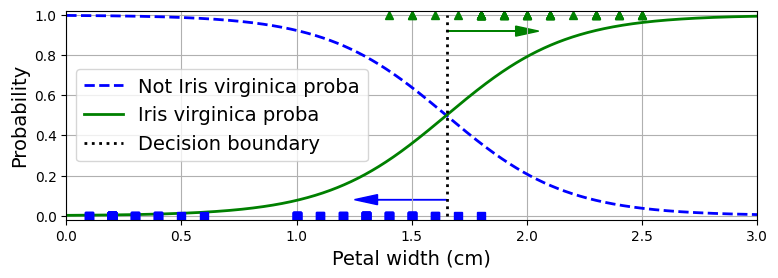

In [66]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)  # reshape to get a column vector
y_proba = log_reg.predict_proba(X_new)
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0, 0]

plt.figure(figsize=(8, 3))  # extra code – not needed, just formatting
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2,
         label="Not Iris virginica proba")
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris virginica proba")
plt.plot([decision_boundary, decision_boundary], [0, 1], "k:", linewidth=2,
         label="Decision boundary")

# extra code – this section beautifies and saves Figure 4–23
plt.arrow(x=decision_boundary, y=0.08, dx=-0.3, dy=0,
          head_width=0.05, head_length=0.1, fc="b", ec="b")
plt.arrow(x=decision_boundary, y=0.92, dx=0.3, dy=0,
          head_width=0.05, head_length=0.1, fc="g", ec="g")
plt.plot(X_train[y_train == 0], y_train[y_train == 0], "bs")
plt.plot(X_train[y_train == 1], y_train[y_train == 1], "g^")
plt.xlabel("Petal width (cm)")
plt.ylabel("Probability")
plt.legend(loc="center left")
plt.axis([0, 3, -0.02, 1.02])
plt.grid()
save_fig("logistic_regression_plot")

plt.show()

In [67]:
decision_boundary

np.float64(1.6516516516516517)

In [68]:
log_reg.predict([[1.7], [1.5]])

array([ True, False])

**Summary**

* Logistic regression uses petal measurements to estimate the probability that a flower is *Iris virginica*, with predictions determined by a probability threshold that defines a decision boundary.

**Key Points**

* *Iris virginica* flowers have **larger petal widths** (≈ 1.4–2.5 cm) than other iris species (≈ 0.1–1.8 cm).
* There is **overlap** in petal width values, so classification is not always certain.
* For **petal width > ~2 cm**:

  * The model predicts *Iris virginica* with **high confidence**.
* For **petal width < ~1 cm**:

  * The model predicts **Not Iris virginica** with high confidence.
* In the **overlap region**, the model is uncertain and outputs probabilities close to 0.5.
* Using `predict_proba()` returns probabilities for each class.
* Using `predict()` returns the **most likely class**, even if confidence is low.
* The **decision boundary** occurs where predicted probability = **50%**.
* In this case, the decision boundary is at approximately **1.6 cm** petal width.
* With **two features** (petal width and petal length):

  * Logistic regression learns a **linear decision boundary**.
  * The dashed line represents points with **50% probability**.
* Parallel lines indicate **constant probability levels** (e.g., 15% to 90%).
* Flowers beyond the top-right probability line have **>90% chance** of being *Iris virginica*.


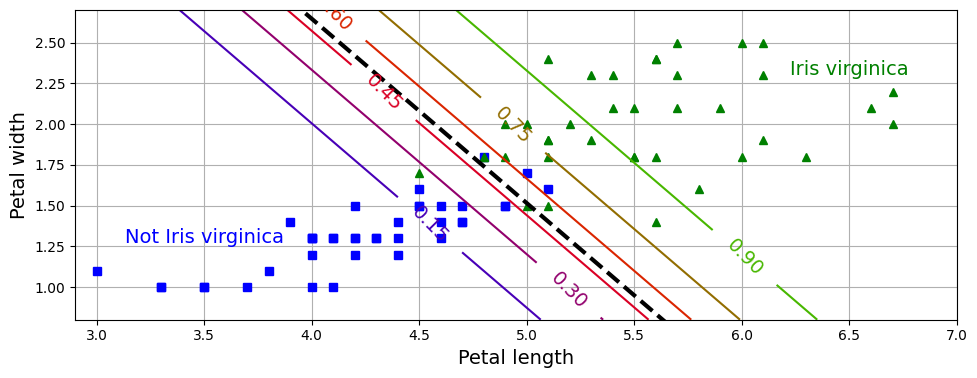

In [70]:
# extra code – this cell generates and saves Figure 4–24

X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = iris.target_names[iris.target] == 'virginica'
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

log_reg = LogisticRegression(C=2, random_state=42)
log_reg.fit(X_train, y_train)

# for the contour plot
x0, x1 = np.meshgrid(np.linspace(2.9, 7, 500).reshape(-1, 1),
                     np.linspace(0.8, 2.7, 200).reshape(-1, 1))
X_new = np.c_[x0.ravel(), x1.ravel()]  # one instance per point on the figure
y_proba = log_reg.predict_proba(X_new)
zz = y_proba[:, 1].reshape(x0.shape)

# for the decision boundary
left_right = np.array([2.9, 7])
boundary = -((log_reg.coef_[0, 0] * left_right + log_reg.intercept_[0])
             / log_reg.coef_[0, 1])

plt.figure(figsize=(10, 4))
plt.plot(X_train[y_train == 0, 0], X_train[y_train == 0, 1], "bs")
plt.plot(X_train[y_train == 1, 0], X_train[y_train == 1, 1], "g^")
contour = plt.contour(x0, x1, zz, cmap=plt.cm.brg)
plt.clabel(contour, inline=1)
plt.plot(left_right, boundary, "k--", linewidth=3)
plt.text(3.5, 1.27, "Not Iris virginica", color="b", ha="center")
plt.text(6.5, 2.3, "Iris virginica", color="g", ha="center")
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.axis([2.9, 7, 0.8, 2.7])
plt.grid()
save_fig("logistic_regression_contour_plot")
plt.show()

**Summary**

* In Scikit-Learn’s logistic regression, regularization strength is controlled by **C**, which is the inverse of α, and ℓ₂ regularization is applied by default.

**Key Points**

* LogisticRegression does **not use α** to control regularization.
* Instead, it uses **C**, which is the **inverse of regularization strength**.
* Relationship:

  * **Large C** → weak regularization
  * **Small C** → strong regularization
* This is opposite to models like **Ridge** or **Lasso**, where larger α means stronger regularization.
* Logistic regression supports:

  * **ℓ₁ (L1)** regularization
  * **ℓ₂ (L2)** regularization
* By default, Scikit-Learn applies **ℓ₂ (L2) regularization**.
* Regularization helps:

  * Reduce overfitting
  * Improve generalization
  * Stabilize the model when features are correlated


## Softmax Regression

**Summary**

* Softmax regression extends logistic regression to handle multiple classes directly by computing class scores and converting them into probabilities.

**Key Points**

* **Softmax regression** is also called **multinomial logistic regression**.
* It allows **multi-class classification** without combining multiple binary classifiers.
* For a given input **x**, the model computes a **score for each class k**.
* Each class has its own parameter vector **θ⁽ᵏ⁾**.
* The score computation is **linear**, just like linear regression.
* These scores are then passed through the **softmax function** to obtain class probabilities.
* The class with the highest probability is selected as the prediction.

**Formula (notebook-ready)**

Softmax score for class *k*:
$$
s_k(x) = x^{T}(\theta^{(k)})
$$

(These scores are later converted into probabilities using the softmax function.)


**Summary**

* In softmax (multinomial logistic) regression, each class has its own parameter vector, and class probabilities are computed by normalizing exponentiated class scores.

**Key Points**

* Each class **k** has a dedicated parameter vector **( \theta^{(k)} )**.
* All class parameter vectors are stored together in a **parameter matrix ( \Theta )**.
* For an input instance **x**, the model computes a **score for each class**.
* These scores are often called **logits** or **unnormalized log-odds**.
* The **softmax function** converts class scores into valid probabilities:

  * All probabilities are between 0 and 1
  * All probabilities sum to 1
* The predicted class is the one with the **highest probability**, which is also the one with the **highest score**.
* The **argmax** operator selects the class index that maximizes a value.

**Formulas (notebook-ready)**

Softmax probability for class ( k ):
$$
\hat{p}_k=
 \sigma(\mathbf{s}(x))_k
\frac{\exp(s_k(x))}{\sum_{j=1}^{K} \exp(s_j(x))}
$$

Prediction rule:
$$
\hat{y} =
\arg\max_k \sigma(\mathbf{s}(x))_k =
 \arg\max_k s_k(x) = 
\arg\max_k (\theta^{(k)})^{T}x
$$

Where:

* ( K ) = number of classes
* ( $s_k(x)$ ) = score for class ( k )
* ( $\sigma(\mathbf{s}(x))_k$ ) = predicted probability for class ( k )


> The softmax regression classifier predicts only one class at a time (i.e., it is multiclass, not
multioutput), so it should be used only with mutually exclusive classes, such as different
species of plants. You cannot use it to recognize multiple people in one picture.

**Summary**

* Softmax regression is trained by minimizing the **cross-entropy loss**, which penalizes low predicted probability for the true class and generalizes log loss to multiple classes.

**Key Points**

* Training aims to assign a **high probability to the correct (target) class** and low probabilities to others.
* **Cross entropy** measures how well predicted class probabilities match the true classes.
* The loss increases sharply when the model assigns a **low probability to the true class**.
* For each training instance, the loss aggregates contributions from **all classes**.
* Target labels are typically **one-hot encoded**:

  * ( y_k^{(i)} = 1 ) if instance ( i ) belongs to class ( k )
  * ( y_k^{(i)} = 0 ) otherwise
* When the number of classes **K = 2**, cross entropy **reduces to logistic regression log loss**.
* The cost function is **convex**, enabling reliable optimization with gradient descent.

**Formula (notebook-ready)**

Cross-entropy cost function:
$$
J(\Theta) = 
-\frac{1}{m}
\sum_{i=1}^{m}
\sum_{k=1}^{K}
y_k^{(i)}
\log \hat{p}_k^{(i)}
$$

Where:

* ( m ) = number of training instances
* ( K ) = number of classes
* ( $y_k^{(i)} \in {0,1}$ ) = true label (one-hot)
* ( $\hat{p}_k^{(i)}$ ) = predicted probability for class ( k )


**Summary**

* Softmax regression is trained by computing a gradient for each class and using optimization algorithms to minimize cross-entropy, and Scikit-Learn handles this automatically for multiclass problems.

**Key Points**

* The cross-entropy cost function has a **separate gradient for each class**.
* Each class **k** has its own parameter vector **( $\theta^{(k)}$ )**.
* The gradient measures the difference between:

  * Predicted probability ( $\hat{p}_k$ )
  * True label ( $y_k$ )
* Gradients are averaged over all training instances.
* Once gradients for all classes are computed:

  * **Gradient descent** (or another optimizer) updates the parameter matrix **Θ**.
* This process finds the **Θ that minimizes cross-entropy loss**.
* For multiclass problems:

  * Scikit-Learn’s **LogisticRegression** automatically uses **softmax regression**.
* This happens when:

  * Number of classes > 2
  * `solver="lbfgs"` (default)
* By default, LogisticRegression applies **ℓ₂ regularization**.
* Regularization strength is controlled by **C** (inverse of α).

**Formula (notebook-ready)**

Gradient of cross-entropy loss for class ( k ):
$$
\nabla_{\theta^{(k)}} J(\Theta) = 
\frac{1}{m}
\sum_{i=1}^{m}
\left(
\hat{p}_k^{(i)} - y_k^{(i)}
\right)
x^{(i)}
$$

This gradient is computed **for each class**, and together they update the full parameter matrix **Θ**.


**Summary**

* Cross entropy comes from information theory and measures how well one probability distribution matches another, expressed as the average number of bits needed to encode outcomes.

**Key Points**

* Cross entropy originates from **Claude Shannon’s information theory**.
* It measures the **average number of bits actually used** to encode events when assuming a distribution.
* If your assumed distribution matches reality perfectly:

  * Cross entropy equals the **entropy** (intrinsic unpredictability).
* If the assumption is wrong:

  * Cross entropy increases by the **Kullback–Leibler (KL) divergence**.
* Intuition via encoding:

  * More likely events should use **shorter codes**.
  * Incorrect assumptions lead to **inefficient encoding**.
* In machine learning:

  * Cross entropy penalizes models that assign **low probability to true outcomes**.
* Mathematical definition (discrete case):

  * ( H(p, q) = -\sum_x p(x)\log q(x) )
* Here:

  * ( p ) = true distribution
  * ( q ) = model’s estimated distribution


In [71]:
X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = iris["target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

softmax_reg = LogisticRegression(C=30, random_state=42)
softmax_reg.fit(X_train, y_train)

,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",30
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",42
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`multic

In [72]:
softmax_reg.predict([[5, 2]])

array([2])

In [73]:
softmax_reg.predict_proba([[5, 2]]).round(2)

array([[0.  , 0.04, 0.96]])

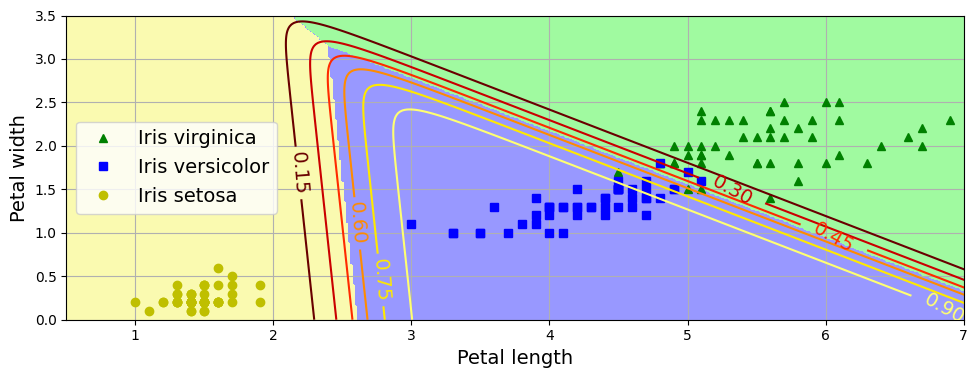

In [74]:
# extra code – this cell generates and saves Figure 4–25

from matplotlib.colors import ListedColormap

custom_cmap = ListedColormap(["#fafab0", "#9898ff", "#a0faa0"])

x0, x1 = np.meshgrid(np.linspace(0, 8, 500).reshape(-1, 1),
                     np.linspace(0, 3.5, 200).reshape(-1, 1))
X_new = np.c_[x0.ravel(), x1.ravel()]

y_proba = softmax_reg.predict_proba(X_new)
y_predict = softmax_reg.predict(X_new)

zz1 = y_proba[:, 1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y == 2, 0], X[y == 2, 1], "g^", label="Iris virginica")
plt.plot(X[y == 1, 0], X[y == 1, 1], "bs", label="Iris versicolor")
plt.plot(X[y == 0, 0], X[y == 0, 1], "yo", label="Iris setosa")

plt.contourf(x0, x1, zz, cmap=custom_cmap)
contour = plt.contour(x0, x1, zz1, cmap="hot")
plt.clabel(contour, inline=1)
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.legend(loc="center left")
plt.axis([0.5, 7, 0, 3.5])
plt.grid()
save_fig("softmax_regression_contour_plot")
plt.show()

# Exercises

## 1. Which linear regression training algorithm can you use if you have a training set with millions of features?

If you have a training set with millions of features you can use Stochastic Gradient Descent or Mini-batch Gradient Descent, and perhaps Batch Gradient Descent if the training set fits in memory. But you cannot use the Normal Equation or the SVD approach because the computational complexity grows quickly (more than quadratically) with the number of features.

## 2. Suppose the features in your training set have very different scales. Which algorithms might suffer from this, and how? What can you do about it?

If the features in your training set have very different scales, the cost function will have the shape of an elongated bowl, so the Gradient Descent algorithms will take a long time to converge. To solve this you should scale the data before training the model. Note that the Normal Equation or SVD approach will work just fine without scaling. Moreover, regularized models may converge to a suboptimal solution if the features are not scaled: since regularization penalizes large weights, features with smaller values will tend to be ignored compared to features with larger values.

## 3. Can gradient descent get stuck in a local minimum when training a logistic regression model?

Gradient Descent cannot get stuck in a local minimum when training a Logistic Regression model because the cost function is convex. Convex means that if you draw a straight line between any two points on the curve, the line never crosses the curve.

## 4. Do all gradient descent algorithms lead to the same model, provided you let them run long enough?

If the optimization problem is convex (such as Linear Regression or Logistic Regression), and assuming the learning rate is not too high, then all Gradient Descent algorithms will approach the global optimum and end up producing fairly similar models. However, unless you gradually reduce the learning rate, Stochastic GD and Mini-batch GD will never truly converge; instead, they will keep jumping back and forth around the global optimum. This means that even if you let them run for a very long time, these Gradient Descent algorithms will produce slightly different models.

## 5. Suppose you use batch gradient descent and you plot the validation error at every epoch. If you notice that the validation error consistently goes up, what is likely going on? How can you fix this?

If the validation error consistently goes up after every epoch, then one possibility is that the learning rate is too high and the algorithm is diverging. If the training error also goes up, then this is clearly the problem and you should reduce the learning rate. However, if the training error is not going up, then your model is overfitting the training set and you should stop training.

## 6. Is it a good idea to stop mini-batch gradient descent immediately when the validation error goes up?

Due to their random nature, neither Stochastic Gradient Descent nor Mini-batch Gradient Descent is guaranteed to make progress at every single training iteration. So if you immediately stop training when the validation error goes up, you may stop much too early, before the optimum is reached. A better option is to save the model at regular intervals; then, when it has not improved for a long time (meaning it will probably never beat the record), you can revert to the best saved model.

## 7. Which gradient descent algorithm (among those we discussed) will reach the vicinity of the optimal solution the fastest? Which will actually converge? How can you make the others converge as well?

Stochastic Gradient Descent has the fastest training iteration since it considers only one training instance at a time, so it is generally the first to reach the vicinity of the global optimum (or Mini-batch GD with a very small mini-batch size). However, only Batch Gradient Descent will actually converge, given enough training time. As mentioned, Stochastic GD and Mini-batch GD will bounce around the optimum, unless you gradually reduce the learning rate.

## 8. Suppose you are using polynomial regression. You plot the learning curves and you notice that there is a large gap between the training error and the validation error. What is happening? What are three ways to solve this?

If the validation error is much higher than the training error, this is likely because your model is overfitting the training set. One way to try to fix this is to reduce the polynomial degree: a model with fewer degrees of freedom is less likely to overfit. Another thing you can try is to regularize the model—for example, by adding an ℓ₂ penalty (Ridge) or an ℓ₁ penalty (Lasso) to the cost function. This will also reduce the degrees of freedom of the model. Lastly, you can try to increase the size of the training set.

## 9. Suppose you are using ridge regression and you notice that the training error and the validation error are almost equal and fairly high. Would you say that the model suffers from high bias or high variance? Should you increase the regularization hyperparameter α or reduce it?

If both the training error and the validation error are almost equal and fairly high, the model is likely underfitting the training set, which means it has a high bias. You should try reducing the regularization hyperparameter α.

## 10. Why would you want to use:
- **a. Ridge regression instead of plain linear regression (i.e., without any
regularization)?**
- **b. Lasso instead of ridge regression?**
- **c. Elastic net instead of lasso regression?**

Let's see:
- A model with some regularization typically performs better than a model without any regularization, so you should generally prefer Ridge Regression over plain Linear Regression.
- Lasso Regression uses an ℓ₁ penalty, which tends to push the weights down to exactly zero. This leads to sparse models, where all weights are zero except for the most important weights. This is a way to perform feature selection automatically, which is good if you suspect that only a few features actually matter. When you are not sure, you should prefer Ridge Regression.
- Elastic Net is generally preferred over Lasso since Lasso may behave erratically in some cases (when several features are strongly correlated or when there are more features than training instances). However, it does add an extra hyperparameter to tune. If you want Lasso without the erratic behavior, you can just use Elastic Net with an l1_ratio close to 1.

## 11. Suppose you want to classify pictures as outdoor/indoor and daytime/nighttime. Should you implement two logistic regression classifiers or one softmax regression classifier?

If you want to classify pictures as outdoor/indoor and daytime/nighttime, since these are not exclusive classes (i.e., all four combinations are possible) you should train two Logistic Regression classifiers.

## 12. Implement batch gradient descent with early stopping for softmax regression without using Scikit-Learn, only NumPy. Use it on a classification task such as the iris dataset.

In [75]:
X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = iris["target"].values

In [78]:
# X

In [79]:
# y

We need to add the bias term for every instance ( x0=1 ). The easiest option to do this would be to use Scikit-Learn's add_dummy_feature() function, but the point of this exercise is to get a better understanding of the algorithms by implementing them manually. So here is one possible implementation:

In [80]:
X_with_bias = np.c_[np.ones(len(X)), X]

In [82]:
# X_with_bias

In [83]:
test_ratio = 0.2
validation_ratio = 0.2
total_size = len(X_with_bias)

test_size = int(total_size * test_ratio)
validation_size = int(total_size * validation_ratio)
train_size = total_size - test_size - validation_size

np.random.seed(42)
rnd_indices = np.random.permutation(total_size)

X_train = X_with_bias[rnd_indices[:train_size]]
y_train = y[rnd_indices[:train_size]]
X_valid = X_with_bias[rnd_indices[train_size:-test_size]]
y_valid = y[rnd_indices[train_size:-test_size]]
X_test = X_with_bias[rnd_indices[-test_size:]]
y_test = y[rnd_indices[-test_size:]]

The targets are currently class indices (0, 1 or 2), but we need target class probabilities to train the Softmax Regression model. Each instance will have target class probabilities equal to 0.0 for all classes except for the target class which will have a probability of 1.0 (in other words, the vector of class probabilities for any given instance is a one-hot vector). Let's write a small function to convert the vector of class indices into a matrix containing a one-hot vector for each instance. To understand this code, you need to know that np.diag(np.ones(n)) creates an n×n matrix full of 0s except for 1s on the main diagonal. Moreover, if a is a NumPy array, then a[[1, 3, 2]] returns an array with 3 rows equal to a[1], a[3] and a[2]

In [84]:
def to_one_hot(y):
    return np.diag(np.ones(y.max() + 1))[y]

In [85]:
y_train[:10]

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1])

In [86]:
to_one_hot(y_train[:10])

array([[0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.]])

In [87]:
Y_train_one_hot = to_one_hot(y_train)
Y_valid_one_hot = to_one_hot(y_valid)
Y_test_one_hot = to_one_hot(y_test)

Now let's scale the inputs. We compute the mean and standard deviation of each feature on the training set (except for the bias feature), then we center and scale each feature in the training set, the validation set, and the test set:

In [88]:
mean = X_train[:, 1:].mean(axis=0)
std = X_train[:, 1:].std(axis=0)
X_train[:, 1:] = (X_train[:, 1:] - mean) / std
X_valid[:, 1:] = (X_valid[:, 1:] - mean) / std
X_test[:, 1:] = (X_test[:, 1:] - mean) / std

Now let's implement the Softmax function. Recall that it is defined by the following equation:

$\sigma\left(\mathbf{s}(\mathbf{x})\right)_k = \dfrac{\exp\left(s_k(\mathbf{x})\right)}{\sum\limits_{j=1}^{K}{\exp\left(s_j(\mathbf{x})\right)}}$

In [89]:
def softmax(logits):
    exps = np.exp(logits)
    exp_sums = exps.sum(axis=1, keepdims=True)
    return exps / exp_sums

In [90]:
n_inputs = X_train.shape[1]  # == 3 (2 features plus the bias term)
n_outputs = len(np.unique(y_train))  # == 3 (there are 3 iris classes)

Now here comes the hardest part: training! Theoretically, it's simple: it's just a matter of translating the math equations into Python code. But in practice, it can be quite tricky: in particular, it's easy to mix up the order of the terms, or the indices. You can even end up with code that looks like it's working but is actually not computing exactly the right thing. When unsure, you should write down the shape of each term in the equation and make sure the corresponding terms in your code match closely. It can also help to evaluate each term independently and print them out. The good news it that you won't have to do this everyday, since all this is well implemented by Scikit-Learn, but it will help you understand what's going on under the hood.

So the equations we will need are the cost function:

$J(\mathbf{\Theta}) = - \dfrac{1}{m}\sum\limits_{i=1}^{m}\sum\limits_{k=1}^{K}{y_k^{(i)}\log\left(\hat{p}_k^{(i)}\right)}$

And the equation for the gradients:

$\nabla_{\mathbf{\theta}^{(k)}} \, J(\mathbf{\Theta}) = \dfrac{1}{m} \sum\limits_{i=1}^{m}{ \left ( \hat{p}^{(i)}_k - y_k^{(i)} \right ) \mathbf{x}^{(i)}}$

Note that $\log\left(\hat{p}_k^{(i)}\right)$ may not be computable if $\hat{p}_k^{(i)} = 0$. So we will add a tiny value $\epsilon$ to $\log\left(\hat{p}_k^{(i)}\right)$ to avoid getting `nan` values.

In [91]:
eta = 0.5
n_epochs = 5001
m = len(X_train)
epsilon = 1e-5

np.random.seed(42)
Theta = np.random.randn(n_inputs, n_outputs)

for epoch in range(n_epochs):
    logits = X_train @ Theta
    Y_proba = softmax(logits)
    if epoch % 1000 == 0:
        Y_proba_valid = softmax(X_valid @ Theta)
        xentropy_losses = -(Y_valid_one_hot * np.log(Y_proba_valid + epsilon))
        print(epoch, xentropy_losses.sum(axis=1).mean())
    error = Y_proba - Y_train_one_hot
    gradients = 1 / m * X_train.T @ error
    Theta = Theta - eta * gradients

0 3.7085808486476917
1000 0.14519367480830644
2000 0.1301309575504088
3000 0.12009639326384539
4000 0.11372961364786884
5000 0.11002459532472425


In [92]:
Theta  # model parameter

array([[ 0.41931626,  6.11112089, -5.52429876],
       [-6.53054533, -0.74608616,  8.33137102],
       [-5.28115784,  0.25152675,  6.90680425]])

In [93]:
logits = X_valid @ Theta
Y_proba = softmax(logits)
y_predict = Y_proba.argmax(axis=1)

accuracy_score = (y_predict == y_valid).mean()
accuracy_score

np.float64(0.9333333333333333)

In [94]:
eta = 0.5
n_epochs = 5001
m = len(X_train)
epsilon = 1e-5
alpha = 0.01  # regularization hyperparameter

np.random.seed(42)
Theta = np.random.randn(n_inputs, n_outputs)

for epoch in range(n_epochs):
    logits = X_train @ Theta
    Y_proba = softmax(logits)
    if epoch % 1000 == 0:
        Y_proba_valid = softmax(X_valid @ Theta)
        xentropy_losses = -(Y_valid_one_hot * np.log(Y_proba_valid + epsilon))
        l2_loss = 1 / 2 * (Theta[1:] ** 2).sum()
        total_loss = xentropy_losses.sum(axis=1).mean() + alpha * l2_loss
        print(epoch, total_loss.round(4))
    error = Y_proba - Y_train_one_hot
    gradients = 1 / m * X_train.T @ error
    gradients += np.r_[np.zeros([1, n_outputs]), alpha * Theta[1:]]
    Theta = Theta - eta * gradients

0 3.7372
1000 0.3259
2000 0.3259
3000 0.3259
4000 0.3259
5000 0.3259


In [95]:
logits = X_valid @ Theta
Y_proba = softmax(logits)
y_predict = Y_proba.argmax(axis=1)

accuracy_score = (y_predict == y_valid).mean()
accuracy_score

np.float64(0.9333333333333333)

Now let's add early stopping. For this we just need to measure the loss on the validation set at every iteration and stop when the error starts growing.

In [96]:
eta = 0.5
n_epochs = 50_001
m = len(X_train)
epsilon = 1e-5
C = 100  # regularization hyperparameter
best_loss = np.inf

np.random.seed(42)
Theta = np.random.randn(n_inputs, n_outputs)

for epoch in range(n_epochs):
    logits = X_train @ Theta
    Y_proba = softmax(logits)
    Y_proba_valid = softmax(X_valid @ Theta)
    xentropy_losses = -(Y_valid_one_hot * np.log(Y_proba_valid + epsilon))
    l2_loss = 1 / 2 * (Theta[1:] ** 2).sum()
    total_loss = xentropy_losses.sum(axis=1).mean() + 1 / C * l2_loss
    if epoch % 1000 == 0:
        print(epoch, total_loss.round(4))
    if total_loss < best_loss:
        best_loss = total_loss
    else:
        print(epoch - 1, best_loss.round(4))
        print(epoch, total_loss.round(4), "early stopping!")
        break
    error = Y_proba - Y_train_one_hot
    gradients = 1 / m * X_train.T @ error
    gradients += np.r_[np.zeros([1, n_outputs]), 1 / C * Theta[1:]]
    Theta = Theta - eta * gradients

0 3.7372
281 0.3256
282 0.3256 early stopping!


In [97]:
logits = X_valid @ Theta
Y_proba = softmax(logits)
y_predict = Y_proba.argmax(axis=1)

accuracy_score = (y_predict == y_valid).mean()
accuracy_score

np.float64(0.9333333333333333)

Now let's plot the model's predictions on the whole dataset (remember to scale all features fed to the model):

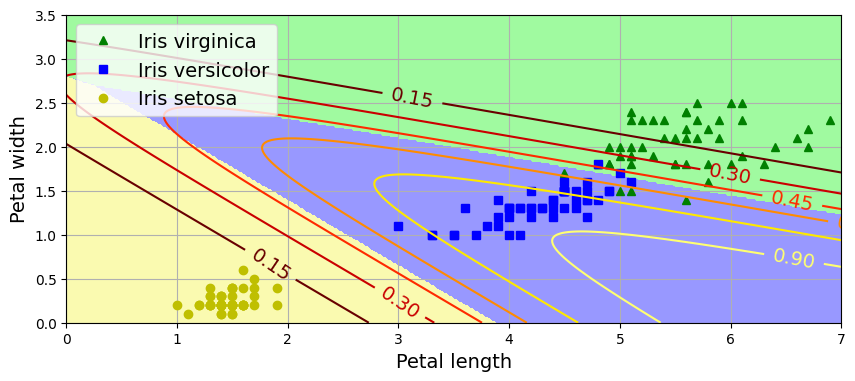

In [98]:
custom_cmap = mpl.colors.ListedColormap(['#fafab0', '#9898ff', '#a0faa0'])

x0, x1 = np.meshgrid(np.linspace(0, 8, 500).reshape(-1, 1),
                     np.linspace(0, 3.5, 200).reshape(-1, 1))
X_new = np.c_[x0.ravel(), x1.ravel()]
X_new = (X_new - mean) / std
X_new_with_bias = np.c_[np.ones(len(X_new)), X_new]

logits = X_new_with_bias @ Theta
Y_proba = softmax(logits)
y_predict = Y_proba.argmax(axis=1)

zz1 = Y_proba[:, 1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y == 2, 0], X[y == 2, 1], "g^", label="Iris virginica")
plt.plot(X[y == 1, 0], X[y == 1, 1], "bs", label="Iris versicolor")
plt.plot(X[y == 0, 0], X[y == 0, 1], "yo", label="Iris setosa")

plt.contourf(x0, x1, zz, cmap=custom_cmap)
contour = plt.contour(x0, x1, zz1, cmap="hot")
plt.clabel(contour, inline=1)
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.legend(loc="upper left")
plt.axis([0, 7, 0, 3.5])
plt.grid()
plt.show()

In [99]:
logits = X_test @ Theta
Y_proba = softmax(logits)
y_predict = Y_proba.argmax(axis=1)

accuracy_score = (y_predict == y_test).mean()
accuracy_score

np.float64(0.9666666666666667)